# Loan Application - EDA Case Study 

Participants:
* Vikrant Malik (vikyam99@gmail.com)
* Arvind R. Nair (arvind_nair@outlook.com)

### **`Introduction`** : *Underlying Task Structure*      

* Task 1: Data Gathering, fetch the records of Current Application and Previous Application into DataFrames
* Task 2: Understanding the data: Perform basic DataFrame operations like columns, shape, describe, info, dtypes, ndim, head, tail
* Task 3: Inspect Data:      
     1. Validate the Data Types of columns in both the DataFrames
     2. Obtain Null values counts for both the DataFrames
     3. Identify which columns are not required and can be dropped (Columns with >=50% null values are dropped)
     4. Identify the imputing methods for the null/missing values (Columns with <=13% null values)
     5. Identify outliers in few key Fields 
* Task 4: Data Visualisation: Bin continous columns, create bucket and report observation
* Task 5: Divide the Dataset: 
     1. Find the relative distribution in DataFrame (Data Imbalance)
     2. Based upon `Target` field values i.e. `0` or `1`, divide the data frame into 2 seperate DataFrames
* Task 6: Analysis: Univariate & Bivariate analysis for main 25-30 columns (categorical & continous) with respect to `Target`
* Task 7: Merge: Join application_data with previous data and perform univariate.bivariate analysis to obtain insights from the data.
* Task 8: Correlation: Find top 10 for the Client with payment difficulties with respect to `Target`, refer the explanation in session
* Task 9: Create PPT, max 15 slides with 1 starting page, 1 introduction, 1 Key Fields & 1 ending, rest are details pages with explanation for key fields and data visualization.    
  Recommend final set of Variables that the bankl can use to take decision on the loan applications.

----------------------

**Pre-Tasks - Imports**

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Pandas version in use
pd.__version__

'0.25.1'

In [4]:
# Set display option for Pandas objects to display all the columns when DataFrames are viewed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

NOTE:    
The processes shown below are algined to the Problem statements given in the EDA Case study and are aligned as per the explanation provided in the live session taken on EDA Case study:    
[EDA Case Study Session](https://www.youtube.com/watch?v=BBMbDlBw_Eg&feature=youtu.be)

## Task 1: Obtain Data     
---------------------------      
**Assumption:** We are assuming that the .csv files are present in the same directory as the jupyter notebook file (.ipynb file), hence relative path is used to fetch the data.     
*Incase the excel files are present in different directories then absolute path would be used. In that case we would do something like*     
`pd.read_csv(r"C:\VikrantMalik-Docs\Credit EDA Case Study\application_data.csv")`

In [5]:
# Current Application Data
df_app = pd.read_csv("application_data.csv")

In [6]:
# Previous Application Data
df_prev = pd.read_csv("previous_application.csv")

## Task 2: DataFrame inspection
----------------------

Both df_app & df_prev are observed under this task, sub divisions for each DataFrame is marked as below   

**Application DataFrame: df_app**

In [7]:
# Check the shape
print("Current Application DataFrame : ", df_app.shape)

Current Application DataFrame :  (307511, 122)


In [8]:
# Pick top 5 records
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
# Display column lists
print("Current Application DataFrame : \n", df_app.columns.tolist())

Current Application DataFrame : 
 ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_

In [10]:
# Few analytical insights of application data
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
# Last 5 records
df_app.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [12]:
# Dimensions
df_app.ndim

2

In [13]:
# Data Types of the DF_APP dataframe
# df_app.dtypes

# This has been commented due to large amount of values being displayed. Uncomment to check the output.

**Previous Application DataFrame: df_prev**

In [14]:
print("Previous Application DataFrame : ", df_prev.shape)

Previous Application DataFrame :  (1670214, 37)


In [15]:
# Top 5 records
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print("Previous Application DataFrame : \n", df_prev.columns.tolist())

Previous Application DataFrame : 
 ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [17]:
# last 5 records
df_prev.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [18]:
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [19]:
df_prev.ndim

2

In [20]:
# Data Types of the DF_APP dataframe
# df_prev.dtypes

# This has been commented due to large amount of values being displayed. Uncomment to check the output.

In [21]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

## Task 3: Inspect Data
___________________________
Display few entries from the both dataframe. This will be used as reference when validating the columns datatypes      

**Current Application DataFrame: df_app**

In [22]:
print(len(df_app.columns.tolist()))

122


In [23]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Previous Application DataFrame: df_prev**

In [24]:
print(len(df_prev.columns.tolist()))

37


In [25]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### SubTask 3.1: Check DataType of Columns
-------------------
  
**Current Application DataFrame: df_app**        
Since there are total 122 columns in DF_APP dataframe not all will be displayed at once in operation df_app.info()      
hence breaking the operation into smaller chunks and displaying 45, 45 and rest

In [26]:
df_app.iloc[:, :45].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [27]:
df_app.iloc[:,45:90].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
BASEMENTAREA_AVG                127568 non-null float64
YEARS_BEGINEXPLUATATION_AVG     157504 non-null float64
YEARS_BUILD_AVG                 103023 non-null float64
COMMONAREA_AVG                  92646 non-null float64
ELEVATORS_AVG                   143620 non-null float64
ENTRANCES_AVG                   152683 non-null float64
FLOORSMAX_AVG                   154491 non-null float64
FLOORSMIN_AVG                   98869 non-null float64
LANDAREA_AVG                    124921 non-null float64
LIVINGAPARTMENTS_AVG            97312 non-null float64
LIVINGAREA_AVG                  153161 non-null float64
NONLIVINGAPARTMENTS_AVG         93997 non-null float64
NONLIVINGAREA_AVG               137829 non-null float64
APARTMENTS_MODE                 151450 non-null float64
BASEMENTAREA_MODE               127568 non-null float64
YEARS_BEGINEXPLUATATION_MODE    157504 non-null float

In [28]:
df_app.iloc[:,90:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
EMERGENCYSTATE_MODE           161756 non-null object
OBS_30_CNT_SOCIAL_CIRCLE      306490 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE      306490 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE      306490 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE      306490 non-null float64
DAYS_LAST_PHONE_CHANGE        307510 non-null float64
FLAG_DOCUMENT_2               307511 non-null int64
FLAG_DOCUMENT_3               307511 non-null int64
FLAG_DOCUMENT_4               307511 non-null int64
FLAG_DOCUMENT_5               307511 non-null int64
FLAG_DOCUMENT_6               307511 non-null int64
FLAG_DOCUMENT_7               307511 non-null int64
FLAG_DOCUMENT_8               307511 non-null int64
FLAG_DOCUMENT_9               307511 non-null int64
FLAG_DOCUMENT_10              307511 non-null int64
FLAG_DOCUMENT_11              307511 non-null int64
FLAG_DOCUMENT_12              307511 non-null 

`Conclusion`: Following Data conversion seems incorrect
* **DAYS_REGISTRATION as float64**: as after inspecting the dataframe and what this field represents. INT64 for this column makes more sense we are not interested in hour of a day like 13.5. This will be treated like 14 days when any evaluation is done on the field.      
  So we can either convert float64 to int64 directly or 1st convert DAYS_REGISTRATION using .apply(np.ceil()) and then do datatype conversion.
  
* **OWN_CAR_AGE as float64**: (Assumption the values are in years) as age of the car if used in some evaluation would not affect if the evaluation if its value is like 10.3, 10.5 or 10.75. As all these values can be either floored or ceiled and still the meaning behinf the values wont be lost. As 10.3 or 10.15 can be equated to 10 years approx and similarily for 10.75 or 10.9999 is similar to 11 years.      
  Hence correct data type should be int64
  
* **CNT_FAM_MEMBERS as float64**: Here float value is incorrect as this field represents the number of family members. There can not be family members in floating values like 0.5 or 3.6789 members.     
  Hence correct Datatype would be int64
  
* **Fileds OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE**: These need to be int64 and not float64 since these values represent observation of client's social surroundings with observable days past due and days past due defaults. Having values in fraction here does not make much sense or affect the overall legitimacy of the data. Since 10.75 days would be better represented as 11 days.

* **DAYS_LAST_PHONE_CHANGE as float64**: Should be int64, since evaluations based upon whole numbers will convey the same information as fractions. Since information like 1.5 or 1.99 days does not differ from values 2. Hence converting these into int64 does not result in loss of information.

* **Fields AMT_REQ_CREDIT_BUREAU_HOUR, ,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR**: These values represent Number of enquiries to Credit Bureau about the client before application, so half a query or 0.25th of a query does not make sense. Hence values in fraction do not make sense here.
  Correct type should be int64.
  
Total 14 columns can be converted from float64 to int64 without loss of meaningfull information.

**Previous Application DataFrame: df_prev**

In [29]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [30]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


`Conclusion`: Following Data conversion seems incorrect
* Float values for fields
  1. DAYS_FIRST_DRAWING 
  2. DAYS_FIRST_DUE
  3. DAYS_LAST_DUE_1ST_VERSION
  4. DAYS_LAST_DUE 
  5. DAYS_TERMINATION
  
  Can be converted to int64 without loss of meaningfull information as eg. incase of days last due could be 11.5 still if they are converted and represented as 12 days then also they convey the same information.
*  NFLAG_INSURED_ON_APPROVAL: Can have logically 2 values 0 or 1 hence keeping this as int64 makes more sense.

#### SubTask 3.2: Check Null Values     
-----------------------
Before changing the DataTypes lets check the Null Values 


**Current Application DataFrame: df_app**

In [31]:
# Check the Null values, saving the result into a Series to view only the values which have more than 0 Null values
# Total columns in df_app are 122 out of which 67 have NaN or Null values, all 122 being displayed is not required
# Displaying only those 67 values

df_app_null = df_app.isnull().sum(axis=0)

# Uncomment below to view the count values
# df_app_null[df_app_null[:]!=0]

In [32]:
# Converting into percentage values and displaying all
round ( 100 * ( df_app_null[df_app_null[:]!=0] / len(df_app.index) ), 3)

AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
OWN_CAR_AGE                     65.991
OCCUPATION_TYPE                 31.346
CNT_FAM_MEMBERS                  0.001
EXT_SOURCE_1                    56.381
EXT_SOURCE_2                     0.215
EXT_SOURCE_3                    19.825
APARTMENTS_AVG                  50.750
BASEMENTAREA_AVG                58.516
YEARS_BEGINEXPLUATATION_AVG     48.781
YEARS_BUILD_AVG                 66.498
COMMONAREA_AVG                  69.872
ELEVATORS_AVG                   53.296
ENTRANCES_AVG                   50.349
FLOORSMAX_AVG                   49.761
FLOORSMIN_AVG                   67.849
LANDAREA_AVG                    59.377
LIVINGAPARTMENTS_AVG            68.355
LIVINGAREA_AVG                  50.193
NONLIVINGAPARTMENTS_AVG         69.433
NONLIVINGAREA_AVG               55.179
APARTMENTS_MODE                 50.750
BASEMENTAREA_MODE               58.516
YEARS_BEGINEXPLUATATION_M

**Previous Application DataFrame: df_prev**

In [33]:
# Uncomment below to view the count values
# df_prev.isnull().sum(axis=0)

In [34]:
# Converting into percentage values and displaying all till 3 decimal places
round(100*(df_prev.isnull().sum(axis=0) / len(df_prev.index)), 3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_DOWN_PAYMENT               53.636
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
RATE_DOWN_PAYMENT              53.636
RATE_INTEREST_PRIMARY          99.644
RATE_INTEREST_PRIVILEGED       99.644
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                49.120
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_

#### SubTask 3.3: Drop unnecessary columns
------------------------------------
`NOTE`: As advised in the session [EDA Case Study Session](https://www.youtube.com/watch?v=BBMbDlBw_Eg&feature=youtu.be) only those columns which had 50% or more NaN values or Null values should be dropped. Values like 47.xx, 48.xx or 49.xx are very near to 50%, hence we are considering them as well for drop.      
Hence, *Assuption*: Only Fields with null values >=47% are dropped


**Current Application DataFrame: df_app**

`Observation`:     
Based upon the result of the subtask 3.2, we can see that there are multiple columns in df_app which have more than 47% of their values as NaN or null.     

We can drop these columns from the dataframe as with such high number of NaN values any insights obtained from these columns will not be correct representation of the population as a whole.

Total 49 such Columns can be dropped, more info on exact columns is in following cells.

In [35]:
# Drop unrequired columns with high missing values >= 47% 

df_app.drop("EXT_SOURCE_1", axis=1, inplace = True)

In [36]:
# After dropping above there should be 121 columns in df_app now
len(df_app.columns)

121

In [37]:
# Note we could have also used command like
# df_app.drop("LANDAREA_MEDI", axis=1, inplace = True) 
# or
# df_app.drop(["OWN_CAR_AGE","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BUILD_AVG"], axis=1, inplace = True)

df_app_null = df_app.isnull().sum(axis=0)
df_drop_columns = df_app_null[df_app_null[:]!=0]/df_app.shape[0]*100 >47
df_drop_columns = df_drop_columns[df_drop_columns == True].index.to_list()

df_app.drop(df_drop_columns,axis = 1,inplace = True)

len(df_app.columns)

73

**Previous Application DataFrame: df_prev**

`Observation`:     
Based upon the result of the subtask 3.2, we can see that there are multiple columns in df_prev which have more than 50% of their values as NaN or null.     

`Conclusion`:     
We can drop these columns from the dataframe as with such high number of NaN values any insights obtained from these columns will not be correct representation of the population as a whole.

Total 4 such Columns can be dropped, more info on excat columns is in following cells.

In [38]:
df_prev.drop("AMT_DOWN_PAYMENT", axis=1, inplace=True)
df_prev.drop("RATE_DOWN_PAYMENT", axis=1, inplace=True)
df_prev.drop("RATE_INTEREST_PRIMARY", axis=1, inplace=True)
df_prev.drop("RATE_INTEREST_PRIVILEGED", axis=1, inplace=True)
df_prev.drop("NAME_TYPE_SUITE", axis=1, inplace=True)

In [39]:
len(df_prev.columns)

32

#### SubTask 3.4 Identifying Methods to impute the Null values    
----------------------------
After dropping the above columns, we can now impute the values for columns where dropping was not an option


**Current Application DataFrame: df_app**

In [40]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_app_null = df_app.isnull().sum(axis=0)
round ( 100 * ( df_app_null[df_app_null[:]!=0] / len(df_app.index) ), 3)

AMT_ANNUITY                    0.004
AMT_GOODS_PRICE                0.090
NAME_TYPE_SUITE                0.420
OCCUPATION_TYPE               31.346
CNT_FAM_MEMBERS                0.001
EXT_SOURCE_2                   0.215
EXT_SOURCE_3                  19.825
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
DAYS_LAST_PHONE_CHANGE         0.000
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
AMT_REQ_CREDIT_BUREAU_MON     13.502
AMT_REQ_CREDIT_BUREAU_QRT     13.502
AMT_REQ_CREDIT_BUREAU_YEAR    13.502
dtype: float64

Now, imputing columns with less Null/NaN values depends on the types of the column, what value does it represent.

1. Field: **`OCCUPATION_TYPE`**

In [42]:
# After observing the data in df_app
# we can notice that there is a relation between NAME_INCOME_TYPE and OCCUPATION_TYPE                 
df_app[["NAME_INCOME_TYPE", "OCCUPATION_TYPE"]].head()

,NAME_INCOME_TYPE,OCCUPATION_TYPE
0,Working,Laborers
1,State servant,Core staff
2,Working,Laborers
3,Working,Laborers
4,Working,Core staff


In [43]:
# Based upon the above observation we can obtain the values of the NAME_INCOME_TYPE where OCCUPATION_TYPE is Null/NaN

df_app.loc[df_app["OCCUPATION_TYPE"].isnull(), "NAME_INCOME_TYPE"].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [44]:
# uncomment to understand the point 2 in below conclusion
# df_app.groupby("NAME_INCOME_TYPE")["OCCUPATION_TYPE"].value_counts()

*Conclusion*:     
  1. We can impute the values of OCCUPATION_TYPE with the values of NAME_INCOME_TYPE
  2. We can get the mode value of the OCCUPATION_TYPE for each NAME_INCOME_TYPE. Then for NaN OCCUPATION_TYPE values impute the NaN with mode of OCCUPATION_TYPE for each distinct   NAME_INCOME_TYPE.      
  df_app.groupby("NAME_INCOME_TYPE")["OCCUPATION_TYPE"].value_counts() --> this can be used to get the distribution of NAME_INCOME_TYPE and OCCUPATION_TYPE.
  3. Another approach could be to create a customer logic to impute the values based upon a combination of NAME_INCOME_TYPE and AMT_INCOME_TOTAL.

2. Fields: **`_CNT_SOCIAL_CIRCLE`**    
  * OBS_30_CNT_SOCIAL_CIRCLE         
  * DEF_30_CNT_SOCIAL_CIRCLE         
  * OBS_60_CNT_SOCIAL_CIRCLE
  * DEF_60_CNT_SOCIAL_CIRCLE

Again at 1st glance it might seem that we can replace the NaN values with 0, since there are other 0 values as well.       
But if we check what these Filed represent i.e.      
`How many observation of client's social surroundings with observable 30/60 days past due & DPD default      `
then repalcing these values with 0 would result in cases with False Negatives i.e. cases where there are cases of DPD nearby client are mades as 0 which would mean there were no cases     
same goes for Mean Median or Average values, these also cannot be used to impute the values

*Conclusion* leaving these values as NaN are the best resort

3. Fields: **`AMT_REQ_CREDIT_BUREAU_`**
    
Similar to above _CNT_SOCIAL_CIRCLE, the following fields     
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_MON
* AMT_REQ_CREDIT_BUREAU_QRT
* AMT_REQ_CREDIT_BUREAU_YEAR

represent Number of enquiries to Credit Bureau about the client before application      
Though there are values with 0, neither can Mean, Median or Average values can be used to impute the NaN values.     
Also these fields are cummulative representation of the Cedit so the same value should be rpesent in each of the field as cummulative sum hence mean median and mode does not make sense.
This is because it would result in false representation of the fields.

*Conclusion*: NaN values are best resort here


4. **`Not Imputed`**: No imputation required or possible     
These are the field which hold no significance or no meaningfull insignt can be obtained from these due to either the nature of the field or value in the field,      
or because of lack of information related to the field based upon which imputing decision can be made

   Fields:
   1. NAME_TYPE_SUITE: It does not matter who accompnied the client, information like is client married, does client have clidren are more meaningful and are already provided
   2. EXT_SOURCE_3: Lack of information about the field  

**Previous Application DataFrame: df_prev**

In [45]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
round(100*(df_prev.isnull().sum(axis=0) / len(df_prev.index)), 3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    22.286
NAME_YIELD_GROUP                0.000
PRODUCT_COMBINATION             0.021
DAYS_FIRST_D

Now, imputing columns with less Null/NaN values depends on the types of the column, what value does it represent.

1. Field: **`AMT_ANNUITY`**        
   If we check the value of AMT_ANNUITY incase the NAME_CONTRACT_STATUS is "Cancelled" then we can observe that the null values can be replaced with 0 as logically since the loan was cancelled there was no amount that was given to the client.

In [47]:
df_prev.loc[df_prev["AMT_ANNUITY"].isnull(), "NAME_CONTRACT_STATUS"].value_counts()

Canceled        305805
Refused          40898
Unused offer     25524
Approved             8
Name: NAME_CONTRACT_STATUS, dtype: int64

So by replacing the Canceled values with 0 in AMT_ANNUITY we will reduce the NaN count by approx 82% (305805 / 372235).       
For other remaining 18% of the cases in AMT_ANNUITY, we cannot replace the values with Mean, Median or Mode or any other custom combination since we dont have sufficient information for this.

2. Field: `**AMT_GOODS_PRICE**`      
Similar to AMT_ANNUITY, here as well we can replace the AMT_GOODS_PRICE value with 0 where NAME_CONTRACT_STATUS is in Canceled state.      
And for others we cannot replace the values with Mean, Median or Mode or any other custom combination since we dont have sufficient information for this

In [48]:
df_prev.loc[df_prev["AMT_GOODS_PRICE"].isnull(), "NAME_CONTRACT_STATUS"].value_counts()

Canceled        305570
Approved         42835
Refused          37105
Unused offer         5
Name: NAME_CONTRACT_STATUS, dtype: int64

3. Field: **`CNT_PAYMENT`**     
As per the column description, it represents "Term of previous credit at application of the previous application". We observed that for canceled and Refused cases the value logically can be evaluated to 0 since the contract didn't get completed and no loan was reimbursed hence there wont be any Term as such to be completed.      
Alternatively if under some cases 0 means that there are no term as in full down payment. The we can put -1 here to represent no term.      
And for others we cannot replace the values with Mean, Median or Mode or any other custom combination since we dont have sufficient information for this

#### Subtask 3.1: Data Type conversion, continued
---------------------------------------

Now that we have addressed all the null and incorrect values, we can proceed with DataType conversion.


**Current Application DataFrame: df_app**

convert the -ve days field's value into positive

In [49]:
df_app["DAYS_REGISTRATION"] = df_app["DAYS_REGISTRATION"].apply(np.ceil)
df_app["DAYS_REGISTRATION"] = df_app["DAYS_REGISTRATION"].astype(int)
df_app["DAYS_REGISTRATION"] = df_app["DAYS_REGISTRATION"].abs()

df_app["DAYS_EMPLOYED"] = df_app["DAYS_EMPLOYED"].abs()
df_app["DAYS_BIRTH"] = df_app["DAYS_BIRTH"].abs()
df_app["DAYS_ID_PUBLISH"] = df_app["DAYS_ID_PUBLISH"].abs()

In [50]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Similarily we can proceed with other fields as mentioned in subtask 3.1 previously.

In [51]:
df_app["CNT_FAM_MEMBERS"] = df_app["CNT_FAM_MEMBERS"].astype("Int64")

df_app["OBS_30_CNT_SOCIAL_CIRCLE"] = df_app["OBS_30_CNT_SOCIAL_CIRCLE"].astype("Int64")
df_app["DEF_30_CNT_SOCIAL_CIRCLE"] = df_app["DEF_30_CNT_SOCIAL_CIRCLE"].astype("Int64")
df_app["OBS_60_CNT_SOCIAL_CIRCLE"] = df_app["OBS_60_CNT_SOCIAL_CIRCLE"].astype("Int64")
df_app["DEF_60_CNT_SOCIAL_CIRCLE"] = df_app["DEF_60_CNT_SOCIAL_CIRCLE"].astype("Int64")

df_app["DAYS_LAST_PHONE_CHANGE"] = df_app["DAYS_LAST_PHONE_CHANGE"].apply(np.ceil)
df_app["DAYS_LAST_PHONE_CHANGE"] = df_app["DAYS_LAST_PHONE_CHANGE"].astype("Int64")
df_app["DAYS_LAST_PHONE_CHANGE"] = df_app["DAYS_LAST_PHONE_CHANGE"].abs()

df_app["AMT_REQ_CREDIT_BUREAU_HOUR"] = df_app["AMT_REQ_CREDIT_BUREAU_HOUR"].astype("Int64")
df_app["AMT_REQ_CREDIT_BUREAU_DAY"] = df_app["AMT_REQ_CREDIT_BUREAU_DAY"].astype("Int64")
df_app["AMT_REQ_CREDIT_BUREAU_WEEK"] = df_app["AMT_REQ_CREDIT_BUREAU_WEEK"].astype("Int64")
df_app["AMT_REQ_CREDIT_BUREAU_MON"] = df_app["AMT_REQ_CREDIT_BUREAU_MON"].astype("Int64")
df_app["AMT_REQ_CREDIT_BUREAU_QRT"] = df_app["AMT_REQ_CREDIT_BUREAU_QRT"].astype("Int64")
df_app["AMT_REQ_CREDIT_BUREAU_YEAR"] = df_app["AMT_REQ_CREDIT_BUREAU_YEAR"].astype("Int64")

In [52]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1,0,1,0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2,0,2,0,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0,0,0,0,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# Check basic arithmetic operation to check if value was converted correctly or not
df_app["CNT_FAM_MEMBERS"].mean()

2.152665450442101

**Previous Application DataFrame: df_prev**

In [54]:
df_prev["DAYS_FIRST_DRAWING"] = df_prev["DAYS_FIRST_DRAWING"].astype('Int64')
df_prev["DAYS_FIRST_DUE"] = df_prev["DAYS_FIRST_DUE"].astype('Int64')
df_prev["DAYS_LAST_DUE_1ST_VERSION"] = df_prev["DAYS_LAST_DUE_1ST_VERSION"].astype('Int64')
df_prev["DAYS_LAST_DUE"] = df_prev["DAYS_LAST_DUE"].astype('Int64')
df_prev["DAYS_TERMINATION"] = df_prev["DAYS_TERMINATION"].astype('Int64')

In [55]:
df_prev["NFLAG_INSURED_ON_APPROVAL"] = df_prev["NFLAG_INSURED_ON_APPROVAL"].astype('Int64')

df_prev["DAYS_FIRST_DRAWING"] = df_prev["DAYS_FIRST_DRAWING"].abs()
df_prev["DAYS_FIRST_DUE"] = df_prev["DAYS_FIRST_DUE"].abs()
df_prev["DAYS_LAST_DUE_1ST_VERSION"] = df_prev["DAYS_LAST_DUE_1ST_VERSION"].abs()
df_prev["DAYS_LAST_DUE"] = df_prev["DAYS_LAST_DUE"].abs()
df_prev["DAYS_TERMINATION"] = df_prev["DAYS_TERMINATION"].abs()
df_prev["DAYS_DECISION"] = df_prev["DAYS_DECISION"].abs()

In [56]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243,42,300,42,37,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243,134,916,365243,365243,1
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243,271,59,365243,365243,1
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243,482,152,182,177,1
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### SubTask 3.5: Identify outliers
-------------------------

**Current Application DataFrame: df_app**          
Based upon the dataframe df_app, we will look into some of the fields which can give us some insight as to what the data represents and try to observe any pattern in the data.

In [57]:
df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1,0,1,0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2,0,2,0,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0,0,0,0,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970,477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0,0,0,0,2536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213,619,1,1,0,1,1,0,Accountants,3,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1,0,1,0,1562,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597,2379,1,1,1,1,0,0,Managers,2,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2,0,2,0,1070,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,9

`AMT_INCOME_TOTAL`

In [58]:
df_app["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
# lets check the 90, 95th and 99th percentile
df_app["AMT_INCOME_TOTAL"].quantile([0.9, 0.95, 0.99])

0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

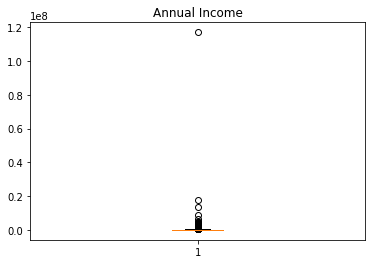

In [60]:
plt.boxplot(df_app["AMT_INCOME_TOTAL"])
plt.title("Annual Income")
plt.show()

From the above plot you can observe that their is very large value (outlier) due to which the interquatile range is not visible.      
To have a better representation of the data we can either:
* Put log values in Y axis
* Omit the outlier and view the data

Here we will plot again with Y axis having log values

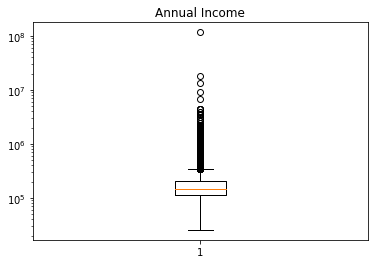

In [61]:
plt.boxplot(df_app["AMT_INCOME_TOTAL"])
plt.title("Annual Income")
plt.yscale("log")
plt.show()

In [62]:
print("Mean with outlier", df_app["AMT_INCOME_TOTAL"].mean())
print("Mean without outlier", df_app.loc[df_app["AMT_INCOME_TOTAL"] < 472500, "AMT_INCOME_TOTAL" ].mean())

Mean with outlier 168797.9192969845
Mean without outlier 162911.01484127034


*Conclusion*: Based upon the above observation we can say that most of the applicants have salaries in 6 figuers or less but there are few (outliers) who are earning salaries in range of 7 or 8 digits.

`REGION_POPULATION_RELATIVE vs  AMT_INCOME_TOTAL`        
Lets check how annual income varry depending upon population desity

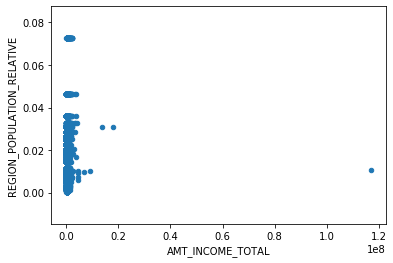

In [63]:
df_app.plot.scatter(x="AMT_INCOME_TOTAL", y="REGION_POPULATION_RELATIVE")
plt.show()

Due to the presense of outlier it is not clear if region population has any affect on the annual income          
lets remove the outlier and check again

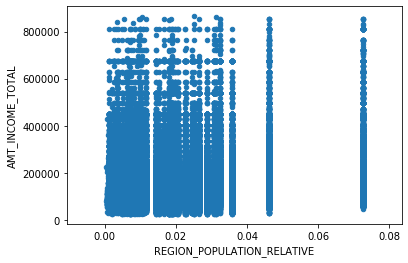

In [64]:
df_app_income = df_app[df_app["AMT_INCOME_TOTAL"] < 872500]
# 472500 -> 99th percentile, calculated above

df_app_income.plot.scatter(y="AMT_INCOME_TOTAL", x="REGION_POPULATION_RELATIVE")
plt.show()

*Conclusion*: Based upon the above observation, we can say that there is no direct relation between AMT_INCOME_TOTAL and REGION_POPULATION_RELATIVE, since there are both high and low values of AMT_INCOME_TOTAL in a single REGION_POPULATION_RELATIVE.

Though there is an outlier which has low density and very high income

`SK_ID_CURR vs REGION_POPULATION_RELATIVE`:

Lets check where does most of the client of the company reside in

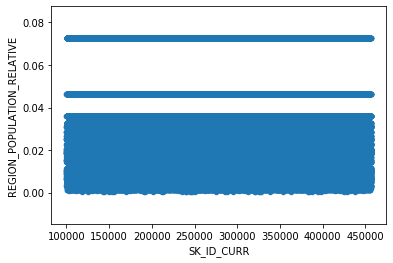

In [65]:
df_app.plot.scatter(x="SK_ID_CURR", y="REGION_POPULATION_RELATIVE")
plt.show()

`Conclusion`: There does not seem to be any relation between client and population.

`AMT_CREDIT vs NAME_EDUCATION_TYPE`:

Let compare loan request amount vs education type does the loan amount vary based upon education qualification

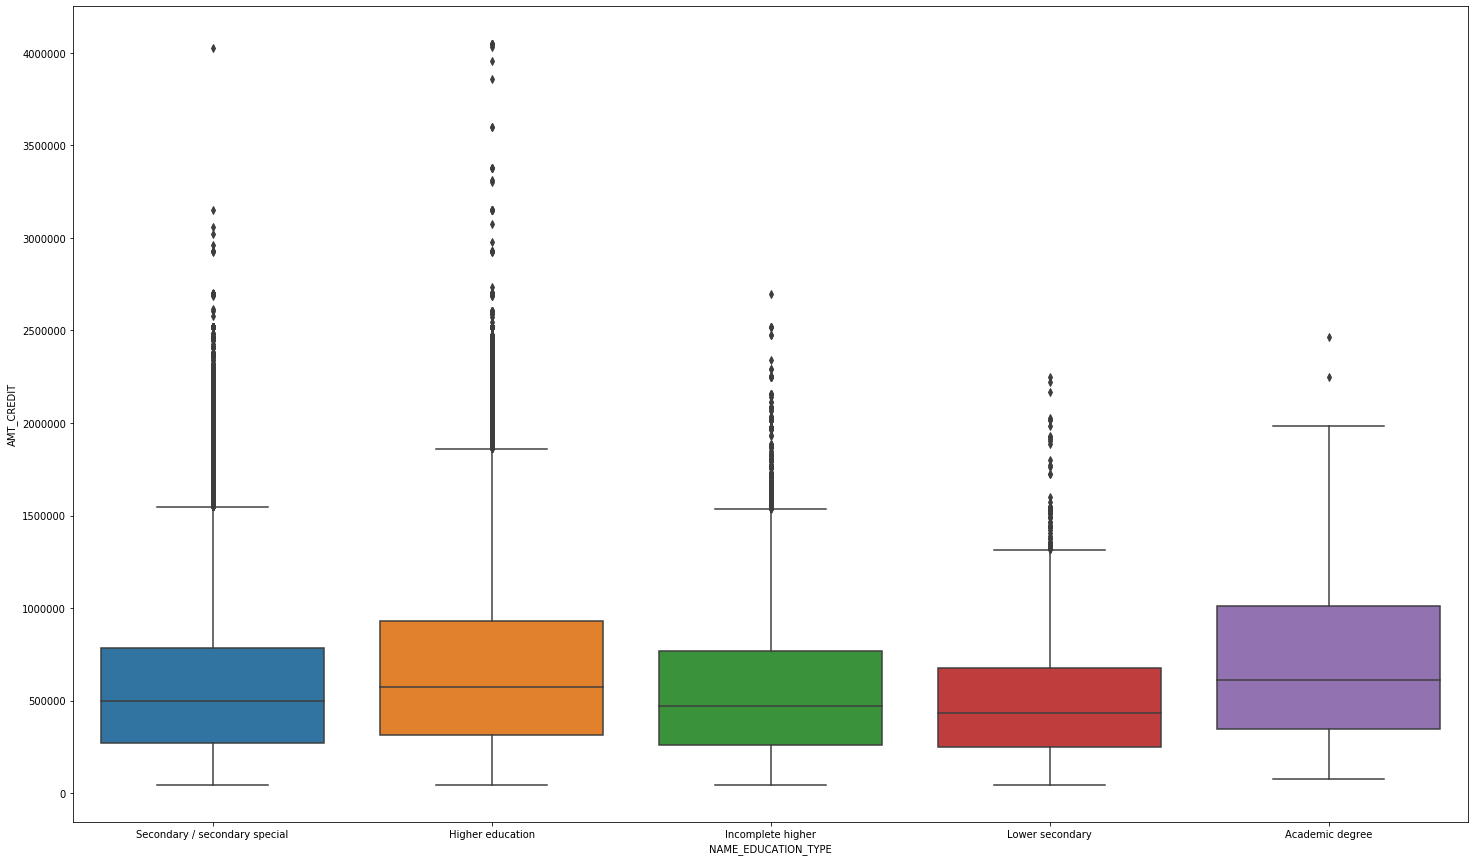

In [66]:
plt.figure(figsize=(25,15))
sns.boxplot(y='AMT_CREDIT', x='NAME_EDUCATION_TYPE', data=df_app)
plt.show()

In [67]:
df_app["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

*Conclusion*: As per the observation of the above graph, it seems like the average or mean of each type of NAME_EDUCATION_TYPE is almost the same.       
It can also be observed that that number of clients who have done some sort of secondary education is way higher than others.

It should also be noted that the loan amount does depend on Education Level to some extent as higher loan amounts were give to those who have completed Secondary or Higher education compared to others. With exception to Academic Degree the spread of requested amount of loan tends to be on the higher end compared to lower education qualifications.

`AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS`:

Lets now check if there is some relation between AMT_INCOME_TOTAL and NAME_FAMILY_STATUS

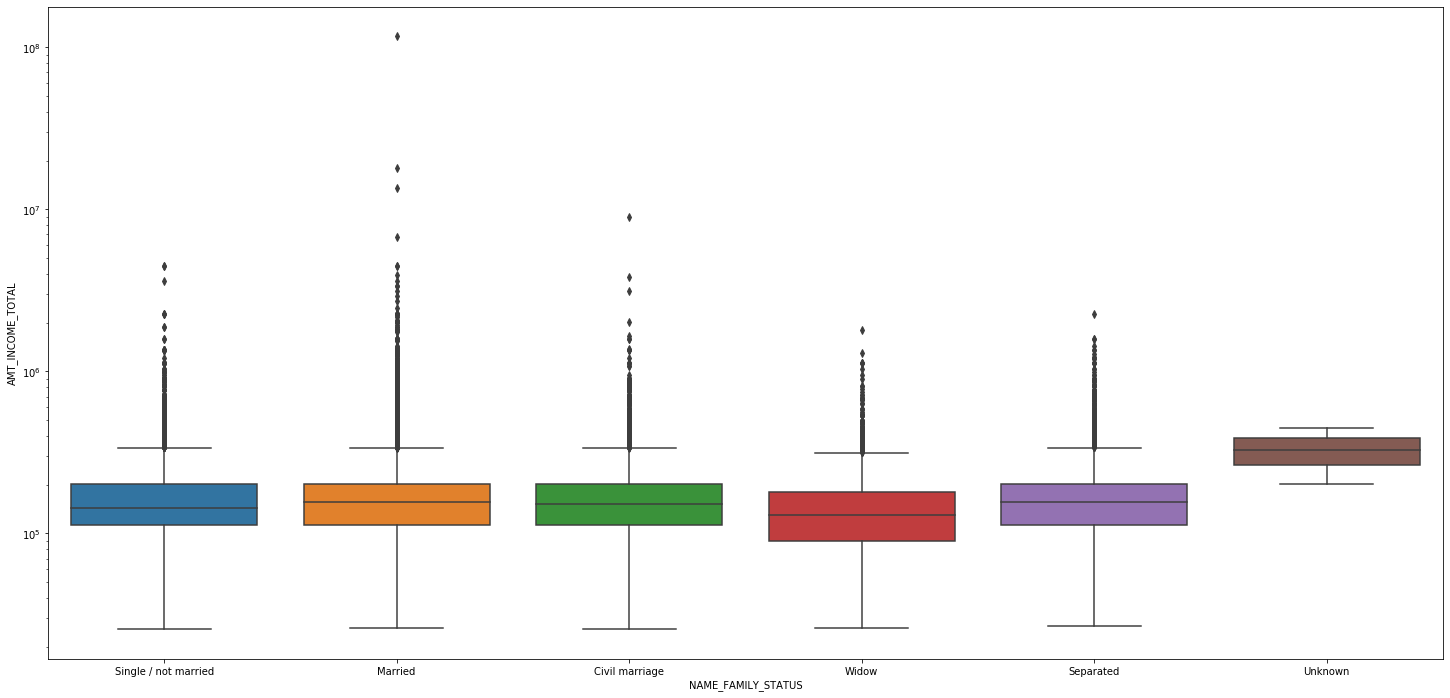

In [68]:
plt.figure(figsize=(25,12))
sns.boxplot(y='AMT_INCOME_TOTAL', x='NAME_FAMILY_STATUS', data=df_app)
plt.yscale("log")
plt.show()

*Conclusion*:      
If we leave unknown/unaccounted for values then majority of the annual income for clients is almost the same i.e. inter quartile range for each category of NAME_FAMILY_STATUS is almost equal, with few outliers in Married category.

## Task 4: Categorical & Continous Data 
___________________________

Lets now explore few other plots like Histograms, bars etc.  

In [69]:
# df_app.head()

In [70]:
# df_prev.head()

**`AMT_INCOME_TOTAL`**

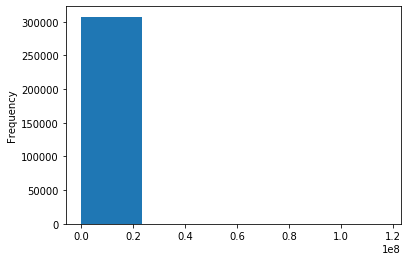

In [71]:
df_app["AMT_INCOME_TOTAL"].plot.hist(bins=5)
plt.show()

so as you can see by default it does not display much information, lets try to break the bins by defining our custom bins based upon quartile values

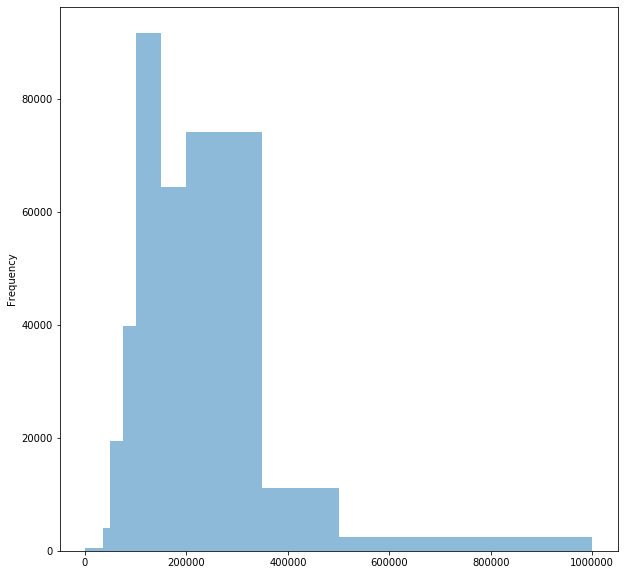

In [72]:
# Lets define our own custom bin size
plt.figure(2, figsize=(10,10))
lv_bin = [0,35000, 50000, 75000, 100000, 150000, 200000, 350000, 500000, 1000000]
df_app["AMT_INCOME_TOTAL"].plot.hist(bins=lv_bin, alpha=0.5)
plt.show()

*Observation*: Maximum records lie between 100,000 and 375,000. There are few values higher than 1,000,000 but for display purpose they have been omitted in the 2nd Plot.

**`AMT_CREDIT`**

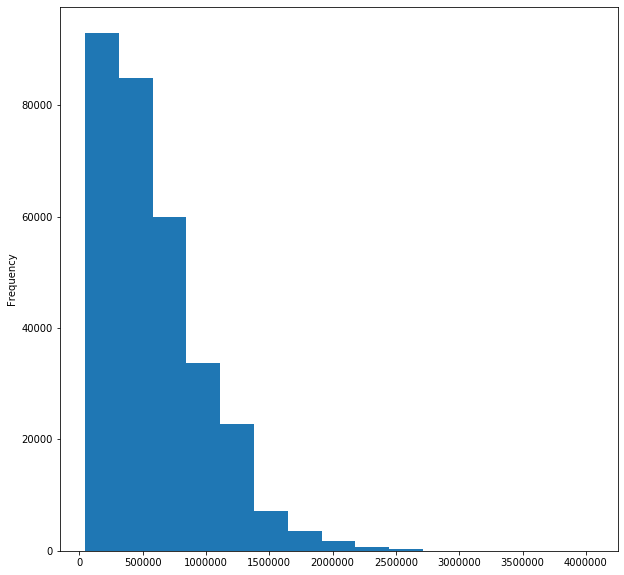

In [73]:
plt.figure(3, figsize=(10,10))
df_app["AMT_CREDIT"].plot.hist(bins=15)
plt.show()

*Observation*: The above graph is a right skwed histogram, which means that the vlaue of mode < median < mean.      

**`DAYS_BIRTH`**:

Lets check the demographics of the current applicants

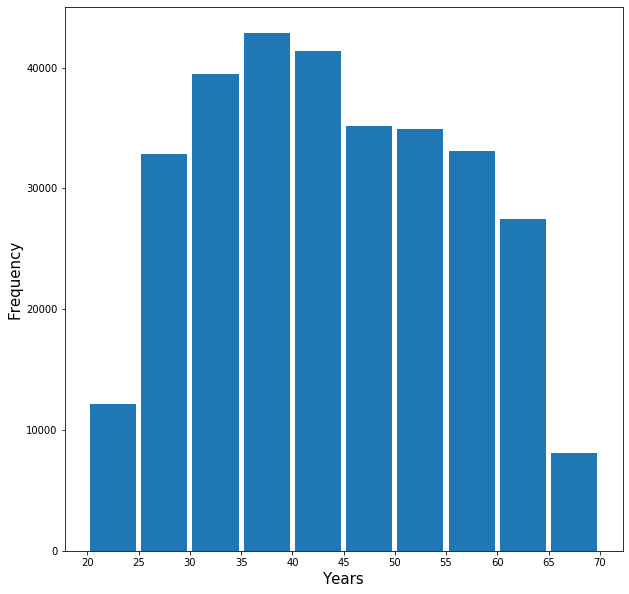

In [74]:
# For simplicity lets divide the DAYS_BIRTH by 365 to obtain the age of the clients in years at the time of application
# Also, for demonstration we are not considering the leap year in between
# create a new field YEARS_BIRTH and store this information

df_app["YEARS_BIRTH"] = df_app["DAYS_BIRTH"] / 365
plt.figure(4, figsize=(10,10))
lv_bin = [20,25,30,35,40,45,50,55,60,65,70]
df_app["YEARS_BIRTH"].plot.hist(bins=lv_bin, rwidth=0.9)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(lv_bin, lv_bin)
plt.show()

*Observation*: The most active demographics as per the above graph is the 30 to 45 age group with the maximum number of applications. There are cases where 65+ have also applied for some type of loan.     
Here also since this is almost a symetrical distribution if we keep 40-45 as center. Then in this case mode < median < mean.            
Later we will check how does this demographic change based upon the Target field.

## Task 5: Data Imbalance
___________________________

Lets check the proportion of Client with payment difficulties and all other cases from df_app dataframe.

In [75]:
df_app["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [76]:
df_app["TARGET"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

As per the above observation, almost 8% of the applicants had faced issues with the payments where as 92%

In [77]:
df_app_t0 = df_app[df_app["TARGET"] == 0 ]
df_app_t1 = df_app[df_app["TARGET"] == 1 ]

In [78]:
len(df_app_t0)

282686

In [79]:
len(df_app_t1)

24825

In [80]:
df_app_t0["AMT_INCOME_TOTAL"].mean()

169077.7222658179

In [81]:
df_app_t1["AMT_INCOME_TOTAL"].mean()

165611.76090634443

## Task 6: Analysis with respect to Target Field            
-------------------------------
Now lets perform some analysis using T0 & T1 dataframes

#### CODE_GENDER

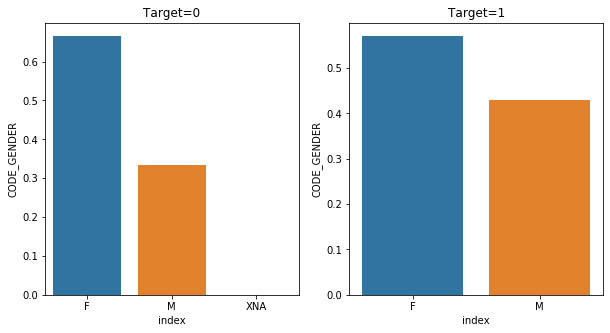

In [82]:
plt.figure(11, figsize=(10, 5))

plt.subplot(1,2,1)
df_temp = df_app_t0["CODE_GENDER"].value_counts(normalize=True)
df_temp = df_temp.reset_index()
sns.barplot(x=df_temp["index"], y=df_temp["CODE_GENDER"])
plt.title("Target=0")

plt.subplot(1,2,2)
df_temp = df_app_t1["CODE_GENDER"].value_counts(normalize=True)
df_temp = df_temp.reset_index()
sns.barplot(x=df_temp["index"], y=df_temp["CODE_GENDER"])
plt.title("Target=1")

plt.show()

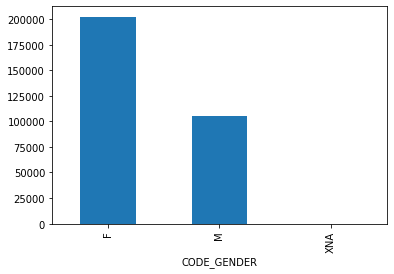

In [83]:
by_gender = df_app.groupby('CODE_GENDER')
by_gender.size().plot(kind='bar')
plt.show()

In [84]:
# relative percentage of Male vs Female applicants
df_app["CODE_GENDER"].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [85]:
# Gender & target based relative
df_app.groupby(["CODE_GENDER"])["TARGET"].value_counts(normalize=True)

CODE_GENDER  TARGET
F            0         0.930007
             1         0.069993
M            0         0.898581
             1         0.101419
XNA          0         1.000000
Name: TARGET, dtype: float64

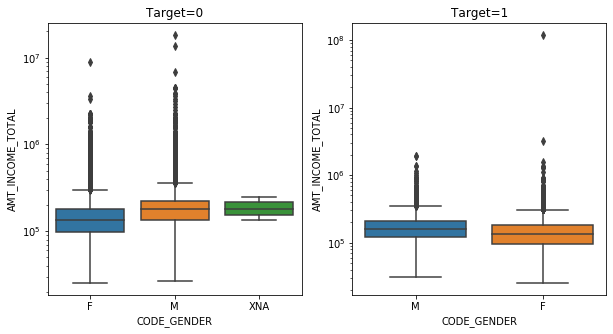

In [86]:
# CODE_GENDER vs AMT_INCOME_TOTAL
plt.figure(12, figsize=(10, 5))

plt.subplot(1,2,1)
sns.boxplot(x=df_app_t0["CODE_GENDER"], y=df_app_t0["AMT_INCOME_TOTAL"])
plt.yscale("log")
plt.title("Target=0")

plt.subplot(1,2,2)
sns.boxplot(x=df_app_t1["CODE_GENDER"], y=df_app_t1["AMT_INCOME_TOTAL"])
plt.yscale("log")
plt.title("Target=1")

plt.show()

In [87]:
df_app.groupby(["CODE_GENDER", "TARGET" ])["AMT_INCOME_TOTAL"].mean()

CODE_GENDER  TARGET
F            0         155984.245110
             1         156670.941531
M            0         195190.418791
             1         177502.085687
XNA          0         186750.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [88]:
pvt_table = pd.pivot_table(data=df_app, index="TARGET", columns="CODE_GENDER", values="AMT_INCOME_TOTAL")
pvt_table

CODE_GENDER,F,M,XNA
TARGET,,,
0,155984.245110,195190.418791,186750.0
1,156670.941531,177502.085687,NaN


`Observation`: Based upon the above graphs and analysis, we can conclude the following
  1. Females are more likely to apply for Loans
  2. Females have higher approval rating and are less likely to default on loans
  3. On average Male have higher annual income compared to Females, with few outliers in each case being exceptions

#### FLAG_OWN_CAR

In [89]:
df_app.groupby(["TARGET"])["FLAG_OWN_CAR"].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185675
        Y                97011
1       N                17249
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64

In [90]:
df_app.groupby(["TARGET", "CODE_GENDER"])["FLAG_OWN_CAR"].value_counts()

TARGET  CODE_GENDER  FLAG_OWN_CAR
0       F            N               145922
                     Y                42356
        M            Y                54653
                     N                39751
        XNA          N                    2
                     Y                    2
1       F            N                11567
                     Y                 2603
        M            N                 5682
                     Y                 4973
Name: FLAG_OWN_CAR, dtype: int64

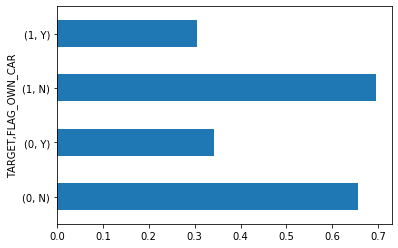

In [91]:
df_app.groupby(["TARGET"])["FLAG_OWN_CAR"].value_counts(normalize=True).plot.barh()
plt.show()

`Observation`: There is no direct relation between Loan being getting approved or it being getting rejected and FLAG_OWN_CAR. Owning a car does not increase or decrease the chances of load application.

#### FLAG_OWN_REALTY

In [92]:
df_app.groupby(["TARGET"])["FLAG_OWN_REALTY"].value_counts()

TARGET  FLAG_OWN_REALTY
0       Y                  196329
        N                   86357
1       Y                   16983
        N                    7842
Name: FLAG_OWN_REALTY, dtype: int64

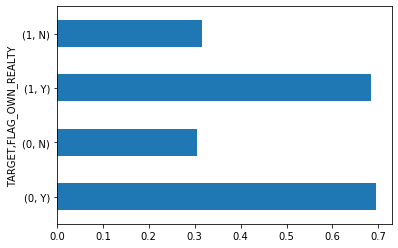

In [93]:
df_app.groupby(["TARGET"])["FLAG_OWN_REALTY"].value_counts(normalize=True).plot.barh()
plt.show()

`Observation`: There is no direct relation between Loan being getting approved or it being getting rejected

#### CNT_CHILDREN

In [94]:
df_app.groupby(["TARGET"])["CNT_CHILDREN"].value_counts(normalize=True)

TARGET  CNT_CHILDREN
0       0               0.703119
        1               0.196915
        2               0.086371
        3               0.011882
        4               0.001323
        5               0.000272
        6               0.000053
        7               0.000025
        14              0.000011
        8               0.000007
        10              0.000007
        12              0.000007
        19              0.000007
1       0               0.669043
        1               0.219698
        2               0.093978
        3               0.014421
        4               0.002216
        5               0.000282
        6               0.000242
        9               0.000081
        11              0.000040
Name: CNT_CHILDREN, dtype: float64

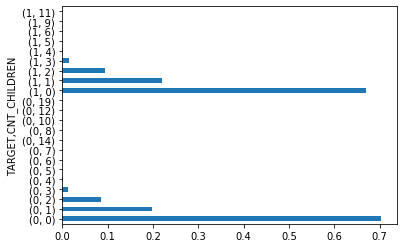

In [95]:
df_app.groupby(["TARGET"])["CNT_CHILDREN"].value_counts(normalize=True).plot.barh()
plt.show()

#### AMT_INCOME_TOTAL

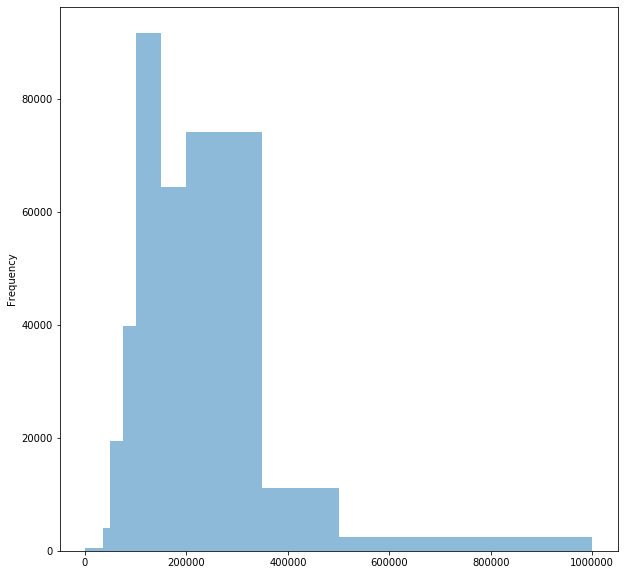

In [96]:
plt.figure(13, figsize=(10,10))
lv_bin = [0,35000, 50000, 75000, 100000, 150000, 200000, 350000, 500000, 1000000]
df_app["AMT_INCOME_TOTAL"].plot.hist(bins=lv_bin, alpha=0.5)
plt.show()

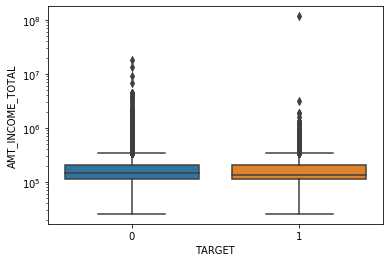

In [97]:
# Since the outliers are of very large value the plot does not scale properly
# hence plotiting the log values of the same to accomodate the value distribution
sns.boxplot(x=df_app["TARGET"], y=df_app["AMT_INCOME_TOTAL"])
plt.yscale("log")
plt.show()

In [98]:
print(len(df_app_t0[df_app_t0["AMT_INCOME_TOTAL"].notnull()]))
print(len(df_app_t1[df_app_t1["AMT_INCOME_TOTAL"].notnull()]))
print(len(df_app_t1[df_app_t1["AMT_INCOME_TOTAL"].notnull()]) / len(df_app_t0[df_app_t0["AMT_INCOME_TOTAL"].notnull()]))

282686
24825
0.08781828601345662


`Observation`: Based upon the above observation, it is more likely if you have a higher annual income then you loan would be approved. But this is not 100% certain as their are outliers with very high salary in Target 1 as well.

#### AMT_CREDIT

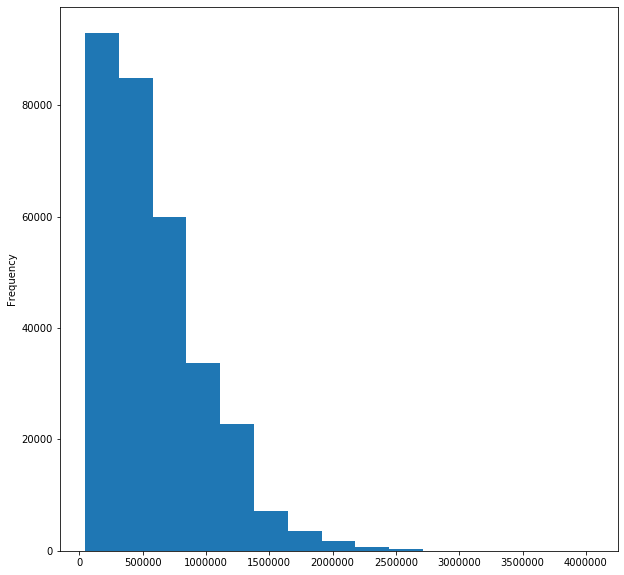

In [99]:
# Lets check the distribution of Amt_credit
plt.figure(3, figsize=(10,10))
df_app["AMT_CREDIT"].plot.hist(bins=15)
plt.show()

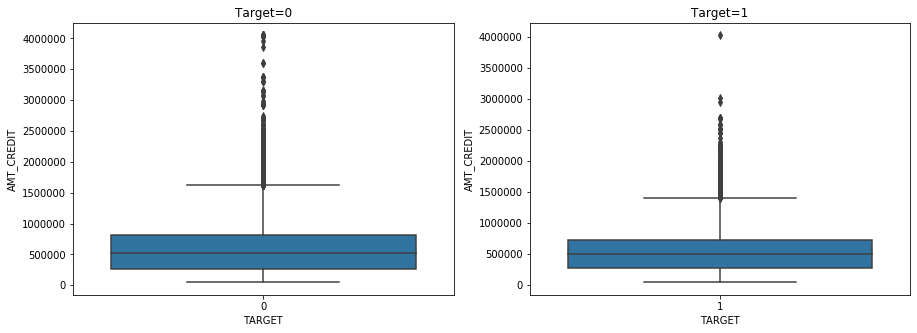

In [100]:
# We can observe that there are high amount of small Loan and very few very large loans
# lets check if the loan amount varries based upon the Target field

plt.figure(14, figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(x=df_app_t0["TARGET"], y=df_app_t0["AMT_CREDIT"])
# plt.yscale("log")
plt.title("Target=0")

plt.subplot(1,2,2)
sns.boxplot(x=df_app_t1["TARGET"], y=df_app_t1["AMT_CREDIT"])
# plt.yscale("log")
plt.title("Target=1")

plt.show()

<Figure size 1440x360 with 0 Axes>

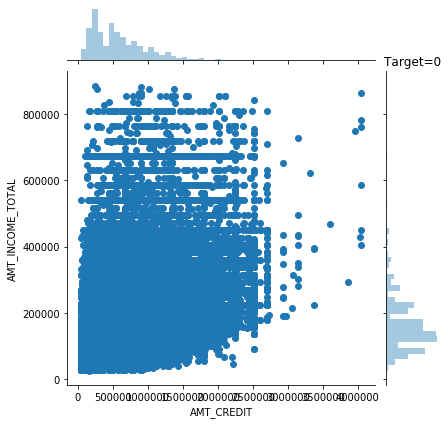

In [101]:
# Lets check AMT_CREDIT with respect to AMT_INCOME_TOTAL

plt.figure(31, figsize=(20, 5))
df_temp = df_app_t0[df_app_t0["AMT_INCOME_TOTAL"] < 900000]
sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", data=df_temp)
plt.title("Target=0")
plt.show()

<Figure size 1080x360 with 0 Axes>

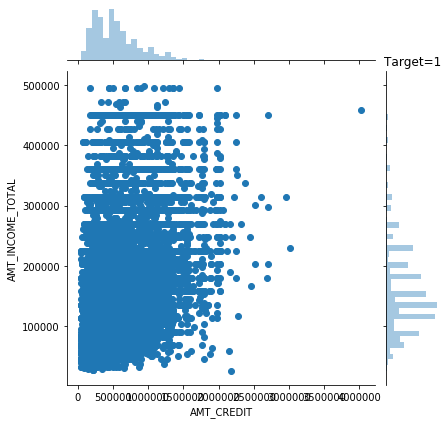

In [102]:
plt.figure(15, figsize=(15, 5))
df_temp = df_app_t1[df_app_t1["AMT_INCOME_TOTAL"] < 500000]
sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", data=df_temp)
plt.title("Target=1")
plt.show()

As per the above observation we can say that the amount of loan does seem to increase with increase in total annual salary of the client but there is not direct relation and other factor would play role in determining the credit amount as same annual income can have different amount of loan credit.

#### NAME_EDUCATION_TYPE

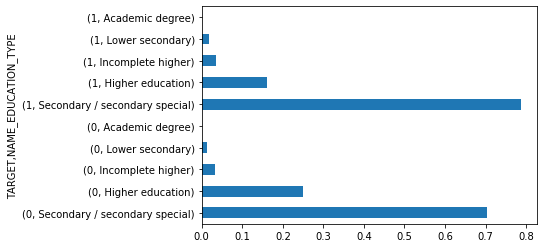

In [103]:
df_app.groupby("TARGET")["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.barh()

In [104]:
df_app.groupby(["TARGET","CODE_GENDER"])["NAME_EDUCATION_TYPE"].value_counts(normalize=True)

TARGET  CODE_GENDER  NAME_EDUCATION_TYPE          
0       F            Secondary / secondary special    0.703502
                     Higher education                 0.254151
                     Incomplete higher                0.030694
                     Lower secondary                  0.011138
                     Academic degree                  0.000515
        M            Secondary / secondary special    0.703477
                     Higher education                 0.243655
                     Incomplete higher                0.038399
                     Lower secondary                  0.013792
                     Academic degree                  0.000678
        XNA          Secondary / secondary special    0.500000
                     Higher education                 0.250000
                     Incomplete higher                0.250000
1       F            Secondary / secondary special    0.777064
                     Higher education                 0.172054
    

In [105]:
df_app.groupby(["TARGET","CODE_GENDER"])["NAME_EDUCATION_TYPE"].value_counts()

TARGET  CODE_GENDER  NAME_EDUCATION_TYPE          
0       F            Secondary / secondary special    132454
                     Higher education                  47851
                     Incomplete higher                  5779
                     Lower secondary                    2097
                     Academic degree                      97
        M            Secondary / secondary special     66411
                     Higher education                  23002
                     Incomplete higher                  3625
                     Lower secondary                    1302
                     Academic degree                      64
        XNA          Secondary / secondary special         2
                     Higher education                      1
                     Incomplete higher                     1
1       F            Secondary / secondary special     11011
                     Higher education                   2438
                     Incomplete hi

After evaluating the NAME_EDUCATION_TYPE, we can say the Female on average put more load applications than male and the approval count is also larger.

#### NAME_FAMILY_STATUS

In [106]:
df_app.groupby("TARGET")["NAME_FAMILY_STATUS"].value_counts()

TARGET  NAME_FAMILY_STATUS  
0       Married                 181582
        Single / not married     40987
        Civil marriage           26814
        Separated                18150
        Widow                    15151
        Unknown                      2
1       Married                  14850
        Single / not married      4457
        Civil marriage            2961
        Separated                 1620
        Widow                      937
Name: NAME_FAMILY_STATUS, dtype: int64

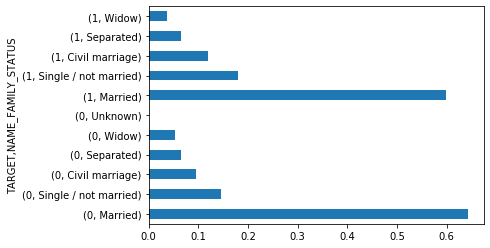

In [107]:
df_app.groupby("TARGET")["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.barh()

In [108]:
df_app.groupby(["TARGET","NAME_FAMILY_STATUS"])["FLAG_OWN_REALTY"].value_counts()

TARGET  NAME_FAMILY_STATUS    FLAG_OWN_REALTY
0       Civil marriage        Y                   18600
                              N                    8214
        Married               Y                  127172
                              N                   54410
        Separated             Y                   12367
                              N                    5783
        Single / not married  Y                   26656
                              N                   14331
        Unknown               Y                       2
        Widow                 Y                   11532
                              N                    3619
1       Civil marriage        Y                    2032
                              N                     929
        Married               Y                   10300
                              N                    4550
        Separated             Y                    1085
                              N                     535
  

So as per the above observation there does not seem to be any direct relation or identifier between NAME_FAMILY_STATUS & FLAG_OWN_REALTY.

It can be noted that if a person is married then the Target value 0 has a higher count, this can be used as a representation stating that people who are married tend to be more punctual.

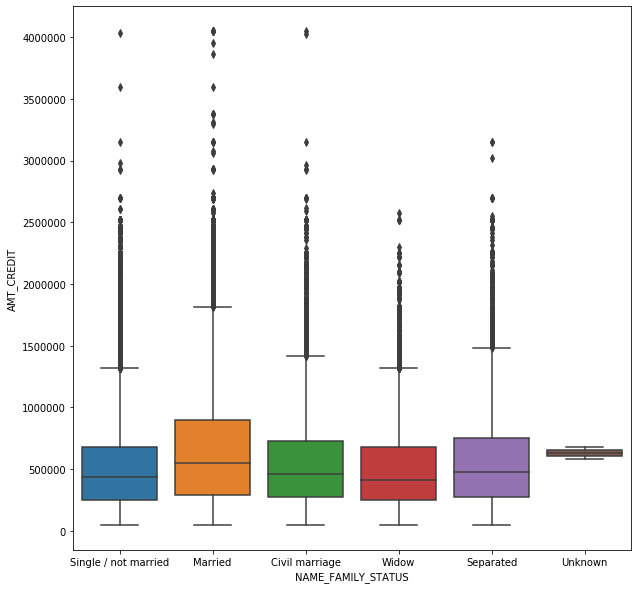

In [109]:
plt.figure(5, figsize=(10,10))
sns.boxplot(y='AMT_CREDIT', x='NAME_FAMILY_STATUS', data=df_app)
plt.show()

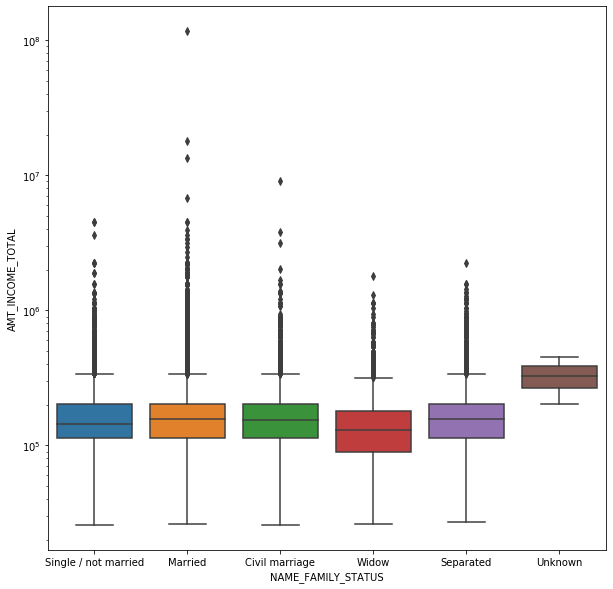

In [110]:
plt.figure(5, figsize=(10,10))
sns.boxplot(y='AMT_INCOME_TOTAL', x='NAME_FAMILY_STATUS', data=df_app)
plt.yscale("log")
plt.show()

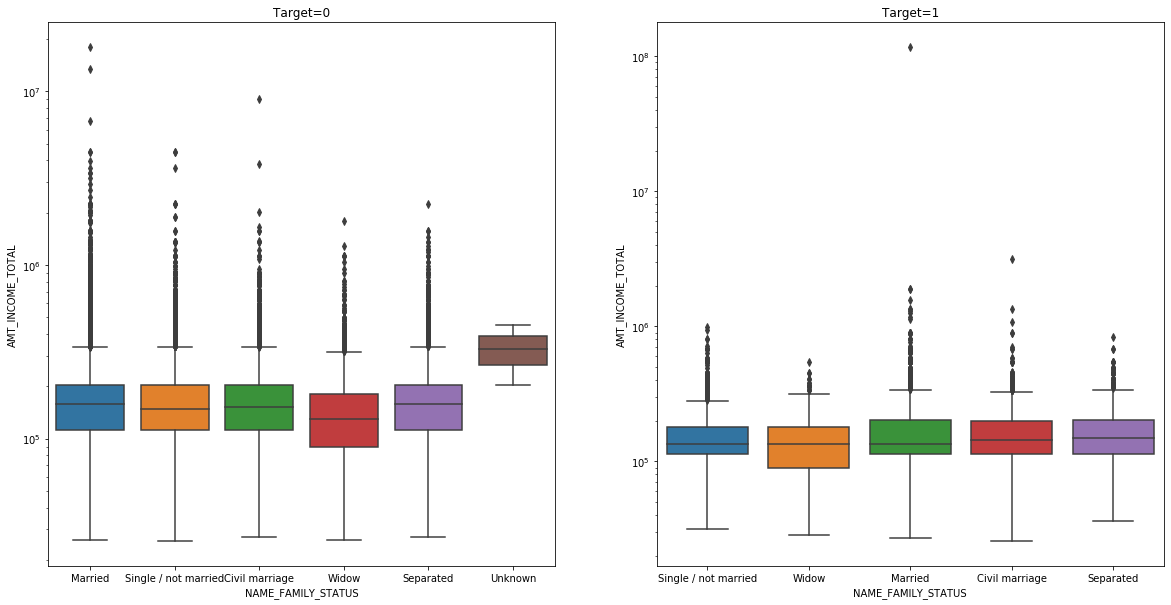

In [111]:
plt.figure(21, figsize=(20, 10))

plt.subplot(1,2,1)
sns.boxplot(y='AMT_INCOME_TOTAL', x='NAME_FAMILY_STATUS', data=df_app_t0)
plt.yscale("log")
plt.title("Target=0")

plt.subplot(1,2,2)
sns.boxplot(y='AMT_INCOME_TOTAL', x='NAME_FAMILY_STATUS', data=df_app_t1)
plt.yscale("log")
plt.title("Target=1")

plt.show()

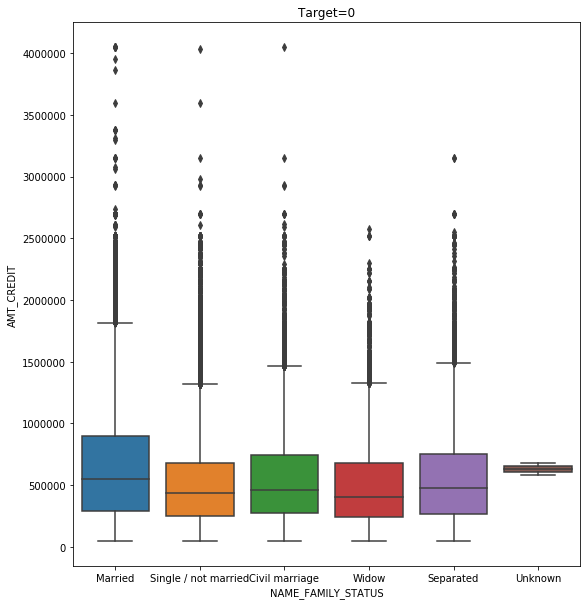

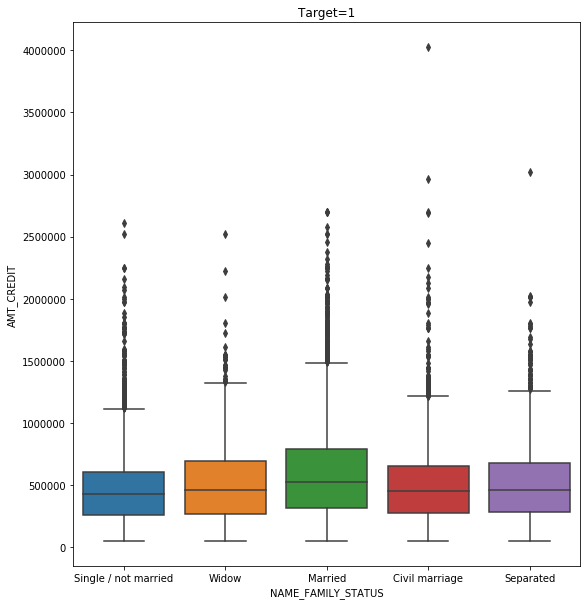

In [112]:
# Client Family Status vs Amount Credit
plt.figure(1,figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'NAME_FAMILY_STATUS',y = 'AMT_CREDIT',data = df_app_t0)
plt.title("Target=0")
plt.figure(2,figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'NAME_FAMILY_STATUS',y = 'AMT_CREDIT',data = df_app_t1)
plt.title("Target=1")
plt.show()

So as per the above observation we can say that the distribution of Annual income inrespect to Family status and target field is almos the same. There is not much difference between the medains in Target 0 vs target 1.

Though we can see some outlier in the both the Targets which have very high income but rest all have similar distributions.

#### REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY

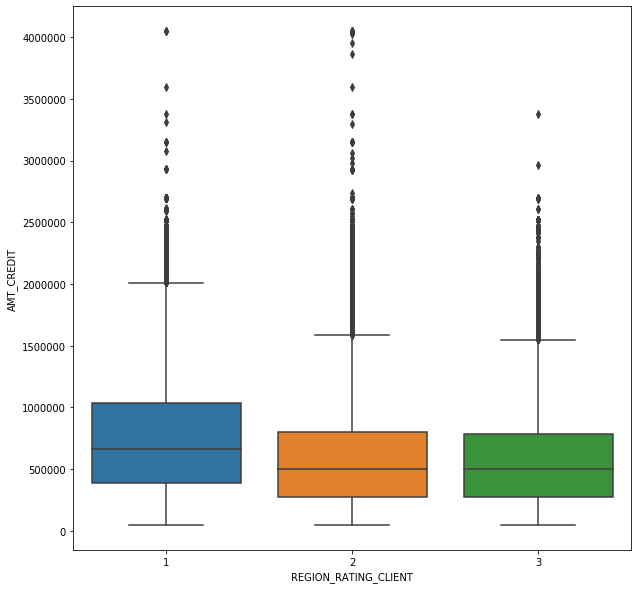

In [113]:
plt.figure(5, figsize=(10,10))
sns.boxplot(y='AMT_CREDIT', x='REGION_RATING_CLIENT', data=df_app)
plt.show()

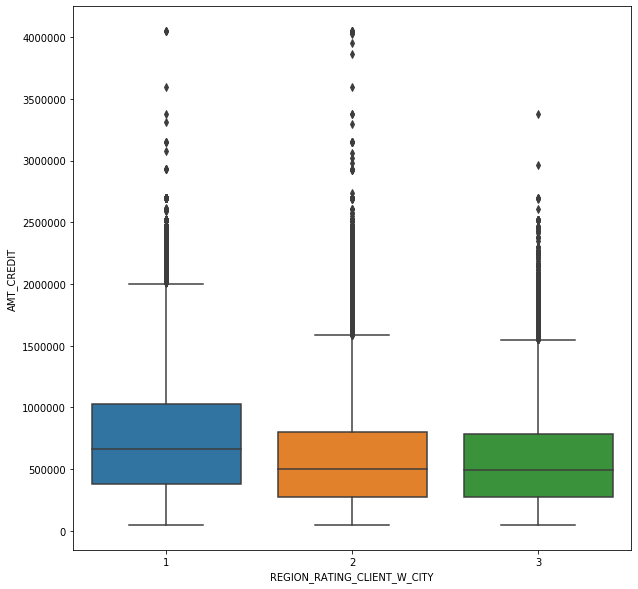

In [114]:
plt.figure(6, figsize=(10,10))
sns.boxplot(y='AMT_CREDIT', x='REGION_RATING_CLIENT_W_CITY', data=df_app)
plt.show()

based upon the above plots, considering rating 1 to be best and rating 3 to be worse then,         
clients within region 1 have higher base loan amount compared to other ratings, though few outliers are visble in each category. But the interquartile range is higher for rating 1.

#### _CNT_SOCIAL_CIRCLE	

So we will compare the social circle fields with the Target field and try to create pivot tables with region rating to check what insights we obtain from it.      
Basic idea behind this operation is to obtain any relation between social circle and region rating for Target fields.

In [115]:
pvt_table = pd.pivot_table(data=df_app_t1, index="REGION_RATING_CLIENT", columns="CODE_GENDER", values="OBS_30_CNT_SOCIAL_CIRCLE")
pvt_table

CODE_GENDER,F,M
REGION_RATING_CLIENT,,
1,1.086957,0.929799
2,1.548521,1.503230
3,1.525499,1.525647


In [116]:
df_app[["TARGET","REGION_RATING_CLIENT", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]].corr()

,TARGET,REGION_RATING_CLIENT,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
TARGET,1.000000,0.058899,0.009131,0.032248,0.009022,0.031276
REGION_RATING_CLIENT,0.058899,1.000000,0.034330,0.015394,0.033951,0.017931
OBS_30_CNT_SOCIAL_CIRCLE,0.009131,0.034330,1.000000,0.329338,0.998490,0.253499
DEF_30_CNT_SOCIAL_CIRCLE,0.032248,0.015394,0.329338,1.000000,0.331571,0.860517
OBS_60_CNT_SOCIAL_CIRCLE,0.009022,0.033951,0.998490,0.331571,1.000000,0.255570
DEF_60_CNT_SOCIAL_CIRCLE,0.031276,0.017931,0.253499,0.860517,0.255570,1.000000


In [117]:
pvt_table = pd.pivot_table(data=df_app, index="CODE_GENDER", columns="NAME_EDUCATION_TYPE", values="DEF_30_CNT_SOCIAL_CIRCLE")
pvt_table

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CODE_GENDER,,,,,
F,0.150,0.124505,0.162080,0.153446,0.157196
M,0.125,0.102591,0.117558,0.138298,0.142584
XNA,NaN,1.000000,4.000000,NaN,0.000000


#### AMT_REQ_CREDIT_BUREAU_

Let check the field liek AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY etc. and their relation with Target field and various other fields as well.

In [118]:
df_app.groupby("TARGET")["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

TARGET  AMT_REQ_CREDIT_BUREAU_HOUR
0       0                             243964
        1                               1435
        2                                 50
        3                                  9
        4                                  1
1       0                              20402
        1                                125
        2                                  6
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

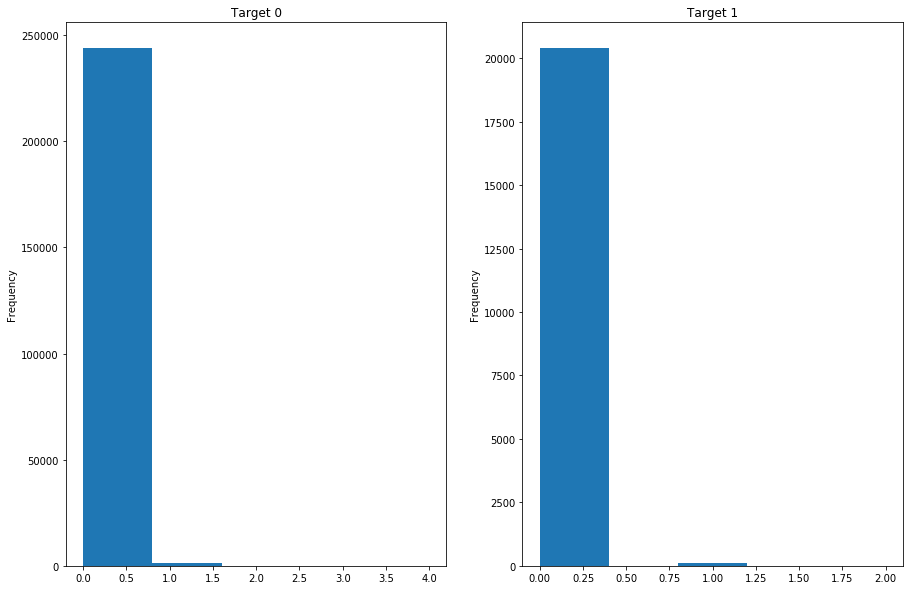

In [119]:
plt.figure(17, figsize=(15,10))

plt.subplot(1,2,1)
df_app_t0["AMT_REQ_CREDIT_BUREAU_HOUR"].plot.hist(bins=5)
plt.title("Target 0")

plt.subplot(1,2,2)
df_app_t1["AMT_REQ_CREDIT_BUREAU_HOUR"].plot.hist(bins=5)
plt.title("Target 1")

plt.show()

In [120]:
df_app.groupby("TARGET")["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

TARGET  AMT_REQ_CREDIT_BUREAU_DAY
0       0                            244111
        1                              1167
        2                                95
        3                                43
        4                                23
        5                                 9
        6                                 8
        9                                 2
        8                                 1
1       0                             20392
        1                               125
        2                                11
        4                                 3
        3                                 2
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [121]:
pvt_table = pd.pivot_table(data=df_app, index="AMT_REQ_CREDIT_BUREAU_WEEK", 
                           columns="TARGET", values="AMT_CREDIT")
round(pvt_table, 3)

TARGET,0,1
AMT_REQ_CREDIT_BUREAU_WEEK,,
0,610089.675,565708.915
1,594397.964,569921.311
2,661913.799,521504.325
3,777461.083,507136.500
4,695774.250,984082.500
5,646940.000,1125000.000
6,566445.316,824823.000
7,686684.250,NaN
8,1187460.000,NaN


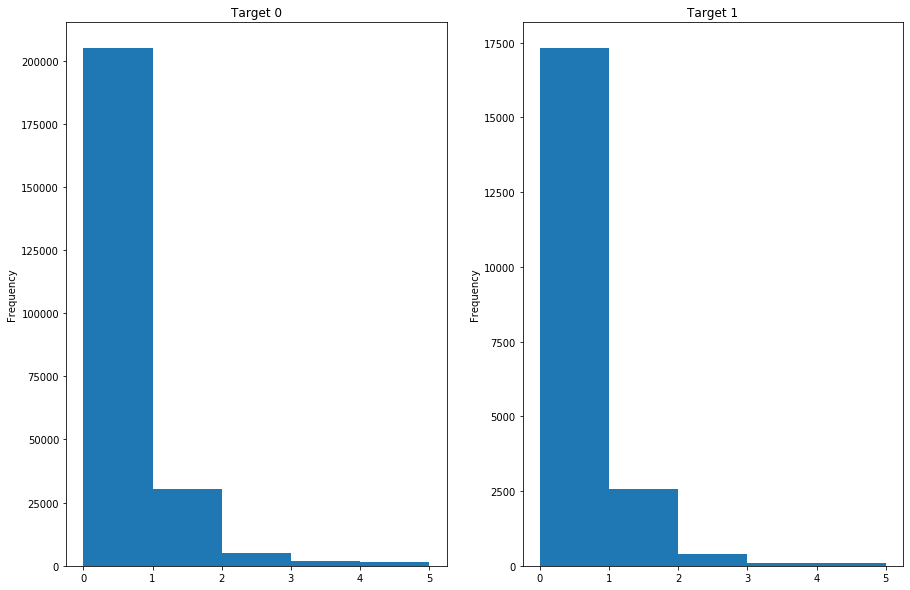

In [122]:
plt.figure(18, figsize=(15,10))

plt.subplot(1,2,1)
lv_bin = [0,1,2,3,4,5]
df_app_t0["AMT_REQ_CREDIT_BUREAU_MON"].plot.hist(bins=lv_bin)
plt.title("Target 0")

plt.subplot(1,2,2)
lv_bin = [0,1,2,3,4,5]
df_app_t1["AMT_REQ_CREDIT_BUREAU_MON"].plot.hist(bins=lv_bin)
plt.title("Target 1")

plt.show()

Observation: Though as per the description of the field AMT_REQ_CREDIT_BUREAU_ one would feel that queries would have negative affect on the Loan process, nut from the above observation it can we stated that this is not the case.       
It can also be observed that even if there are 3, 4 or 5+ enquires made for the applicant, there are chances of loan approval for the client.

#### CNT_FAM_MEMBERS

In [123]:
df_app.groupby("TARGET")["CNT_FAM_MEMBERS"].value_counts()

TARGET  CNT_FAM_MEMBERS
0       2                  146348
        1                   62172
        3                   47993
        4                   22561
        5                    3151
        6                     353
        7                      75
        8                      14
        9                       6
        10                      2
        12                      2
        14                      2
        16                      2
        20                      2
        15                      1
1       2                   12009
        1                    5675
        3                    4608
        4                    2136
        5                     327
        6                      55
        7                       6
        8                       6
        10                      1
        11                      1
        13                      1
Name: CNT_FAM_MEMBERS, dtype: int64

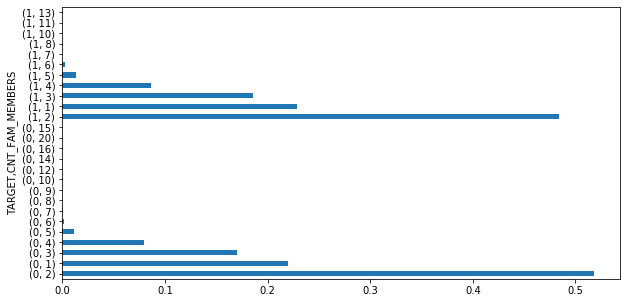

In [124]:
plt.figure(22, figsize=(10,5))
df_app.groupby("TARGET")["CNT_FAM_MEMBERS"].value_counts(normalize=True).plot.barh()
plt.show()

There does not seem to be any direct correlation between Target field and Number of Family members.

#### REGION_POPULATION_RELATIVE                
Lets check how annual income varry depending upon population desity

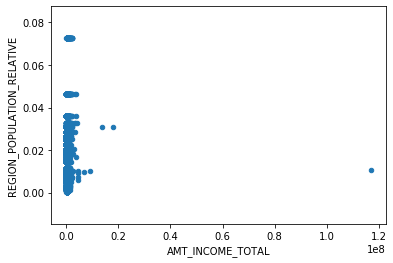

In [125]:
df_app.plot.scatter(x="AMT_INCOME_TOTAL", y="REGION_POPULATION_RELATIVE")
plt.show()

Due to the presens of outlier it is not clear if region population has any affect on the annual income          
lets remove the outlier and check again

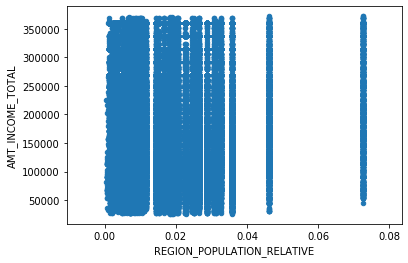

In [126]:
df_app_income = df_app[df_app["AMT_INCOME_TOTAL"] < 372500]
# 472500 -> 99th percentile, calculated above

df_app_income.plot.scatter(y="AMT_INCOME_TOTAL", x="REGION_POPULATION_RELATIVE")
plt.show()

Based upon the above observation, we can say that there is no direct relation between AMT_INCOME_TOTAL and REGION_POPULATION_RELATIVE, since there are both high and low values of AMT_INCOME_TOTAL in a single REGION_POPULATION_RELATIVE.

Though there is an outlier which has low density and very high income

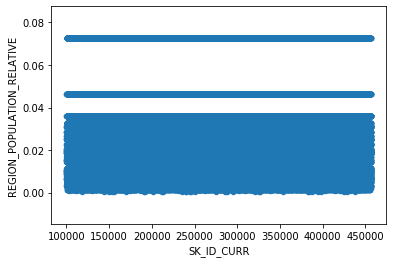

In [127]:
df_app_t0.plot.scatter(x="SK_ID_CURR", y="REGION_POPULATION_RELATIVE")
plt.show()

`Conclusion`: There does not seem to be any relation between client and population.

#### DAYS_BIRTH / YEARS_BIRTH	     

In [128]:
# Commented due to large amount of data
# df_app.groupby("TARGET")["YEARS_BIRTH"].value_counts()

In [129]:
df_app.groupby("TARGET")[["DAYS_BIRTH", "YEARS_BIRTH"]].describe()

DAYS_BIRTH                                                       \
            count          mean          std     min      25%      50%   
TARGET                                                                   
0        282686.0  16138.176397  4364.200856  7489.0  12536.0  15877.0   
1         24825.0  14884.828077  4192.844583  7678.0  11396.0  14282.0   

                          YEARS_BIRTH                                   \
             75%      max       count       mean        std        min   
TARGET                                                                   
0       19793.75  25229.0    282686.0  44.214182  11.956715  20.517808   
1       18037.00  25168.0     24825.0  40.780351  11.487245  21.035616   

                                                    
              25%        50%        75%        max  
TARGET                                              
0       34.345205  43.498630  54.229452  69.120548  
1       31.221918  39.128767  49.416438  68.953425

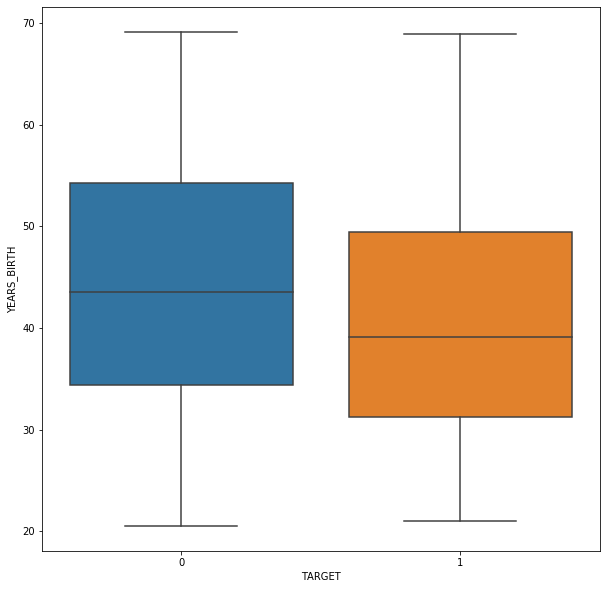

In [130]:
plt.figure(6, figsize=(10,10))
sns.boxplot(y='YEARS_BIRTH', x='TARGET', data=df_app)
plt.show()

From the above observation we can see that the average age incase of Target = 0 is higher than Target = 1

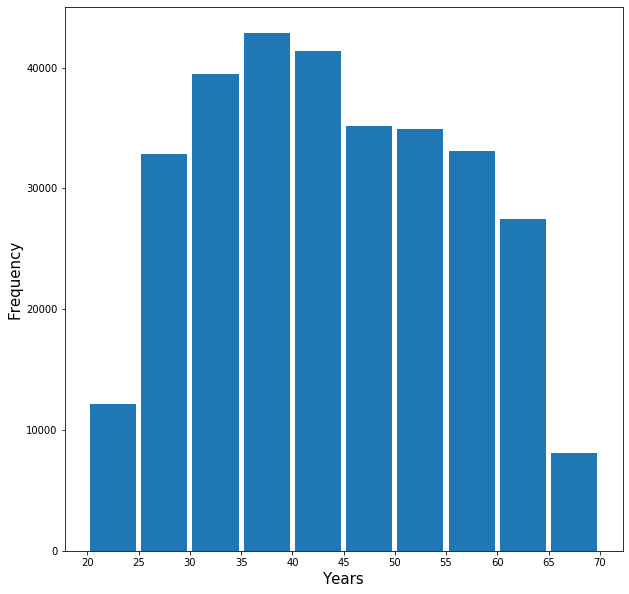

In [131]:
plt.figure(4, figsize=(10,10))
lv_bin = [20,25,30,35,40,45,50,55,60,65,70]
df_app["YEARS_BIRTH"].plot.hist(bins=lv_bin, rwidth=0.9)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(lv_bin, lv_bin)
plt.show()

In [132]:
df_app.groupby(["TARGET", "NAME_FAMILY_STATUS"])["YEARS_BIRTH"].agg(["min", "mean", "max"])

min       mean        max
TARGET NAME_FAMILY_STATUS                                   
0      Civil marriage        21.030137  41.766281  69.030137
       Married               21.021918  44.259135  69.043836
       Separated             21.136986  46.593245  68.997260
       Single / not married  20.517808  39.603847  69.041096
       Unknown               33.961644  34.575342  35.189041
       Widow                 22.679452  57.631009  69.120548
1      Civil marriage        21.098630  39.434588  67.794521
       Married               21.117808  41.101433  68.791781
       Separated             21.441096  43.756787  68.736986
       Single / not married  21.035616  36.281639  68.953425
       Widow                 27.301370  56.197287  68.882192

The most active demographics as per the above graph is the 30 to 45 age group with the maximum number of applications. There are cases where 65+ have also applied for some type of loan.     
Here also since this is almost a symetrical distribution if we keep 40-45 as center. Then in this case mode < median < mean. 

[]

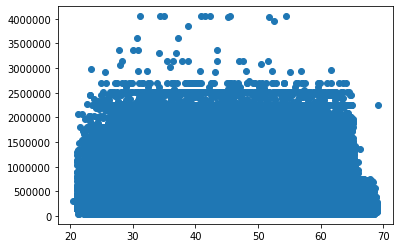

In [133]:
plt.scatter(x="YEARS_BIRTH", y="AMT_CREDIT", data=df_app)
plt.plot()

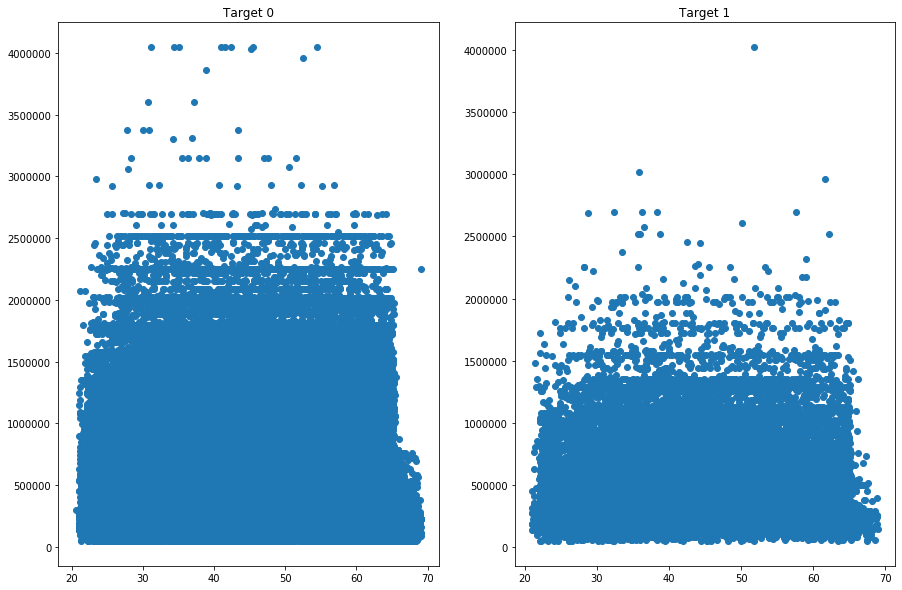

In [134]:
plt.figure(18, figsize=(15,10))

plt.subplot(1,2,1)
plt.scatter(x="YEARS_BIRTH", y="AMT_CREDIT", data=df_app_t0)
plt.title("Target 0")

plt.subplot(1,2,2)
plt.scatter(x="YEARS_BIRTH", y="AMT_CREDIT", data=df_app_t1)
plt.title("Target 1")

plt.show()

[]

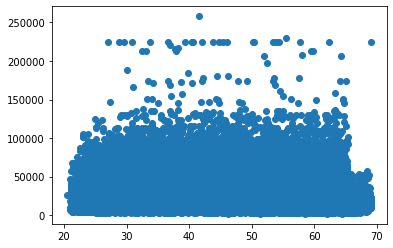

In [135]:
plt.scatter(x="YEARS_BIRTH", y="AMT_ANNUITY", data=df_app)
plt.plot()

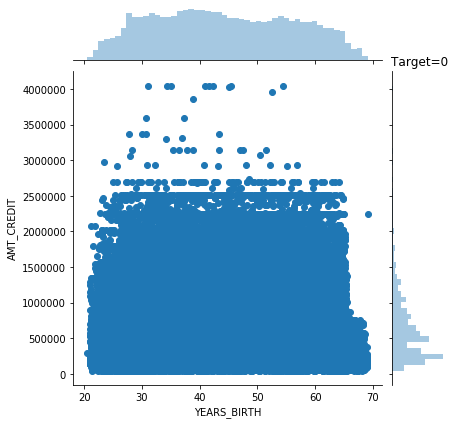

In [136]:
#Age of Client (In Years) vs Credit Amount, Target = 0

sns.jointplot(x = 'YEARS_BIRTH',y = 'AMT_CREDIT',data = df_app_t0 )
plt.title("Target=0")
plt.show()

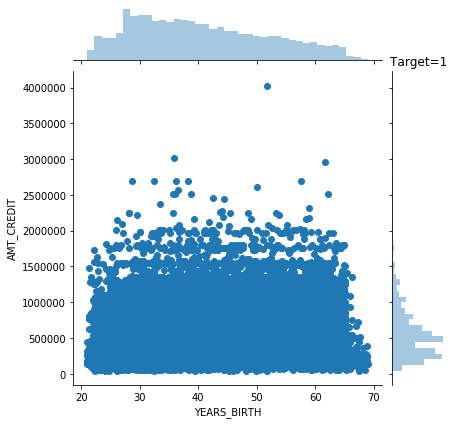

In [137]:
#Age of Client (In Years) vs Credit Amount, Target = 1

sns.jointplot(x = 'YEARS_BIRTH',y = 'AMT_CREDIT',data = df_app_t1)
plt.title("Target=1")
plt.show()

So based upon above 2 plot we can say that there is no direct relation between YEARS_BIRTH and AMT_CREDIT / AMT_ANNUITY

Text(0, 0.5, 'Client Age')

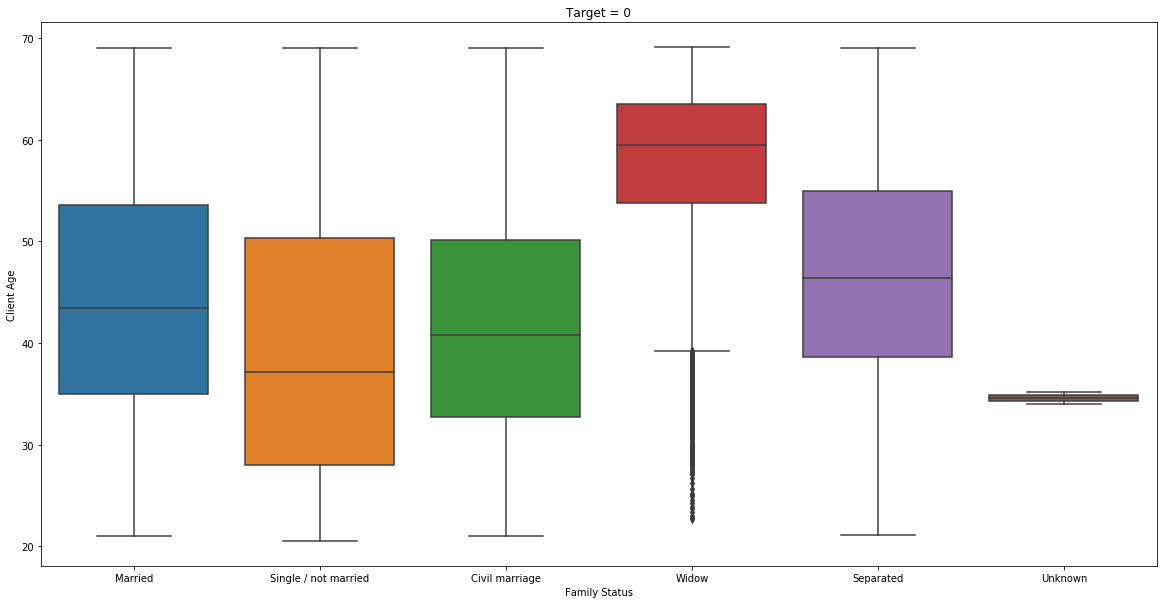

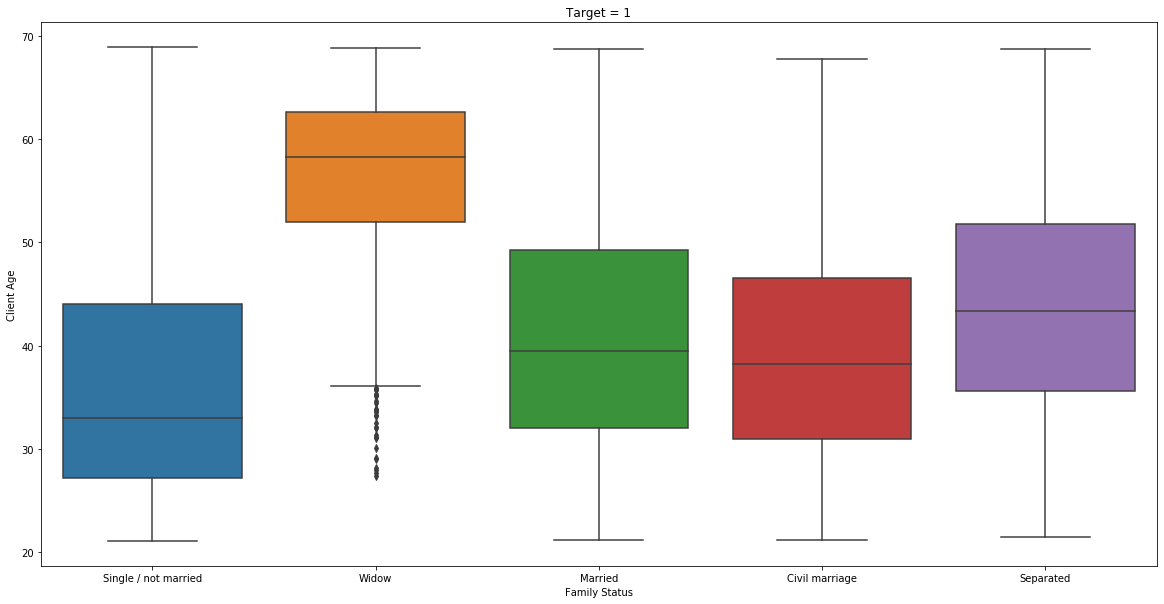

In [138]:
#Age of Client (In Years) vs Family Status, Target = 0
plt.figure(1,figsize = (20,10))
sns.boxplot(x = 'NAME_FAMILY_STATUS', y = 'YEARS_BIRTH', data = df_app_t0)
plt.title("Target = 0")
plt.xlabel("Family Status")
plt.ylabel("Client Age")

#Age of Client (In Years) vs Family Status, Target = 1
plt.figure(2,figsize = (20,10))
sns.boxplot(x = 'NAME_FAMILY_STATUS', y = 'YEARS_BIRTH', data = df_app_t1)
plt.title("Target = 1")
plt.xlabel("Family Status")
plt.ylabel("Client Age")

The median age of the client with no financial difficulties tend to be higher compared to clients with some financial difficulties across categories.

#### DAYS_EMPLOYED

In [139]:
len(df_app.groupby("TARGET")["DAYS_EMPLOYED"].value_counts())

17894

In [140]:
df_app["YEARS_EMPLOYED"] = df_app["DAYS_EMPLOYED"] / 365

In [141]:
df_app["YEARS_EMPLOYED"].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

This seems incorrect as no one can have 1000 years of exp

In [142]:
df_app["YEARS_EMPLOYED"].quantile([0.819, 0.85, 0.95])

0.819      39.490411
0.850    1000.665753
0.950    1000.665753
Name: YEARS_EMPLOYED, dtype: float64

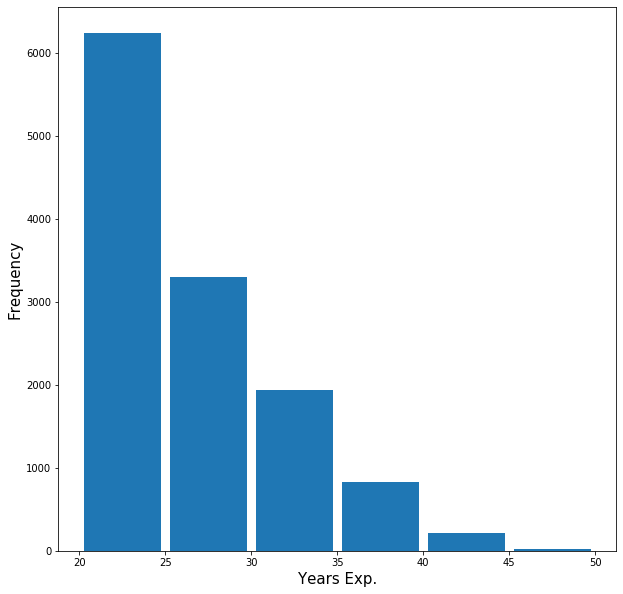

In [143]:
# For better insight we will convert the days to years

plt.figure(4, figsize=(10,10))
lv_bin = [20,25,30,35,40, 45, 50]
df_app["YEARS_EMPLOYED"].plot.hist(bins=lv_bin, rwidth=0.9)
plt.xlabel('Years Exp.',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(lv_bin, lv_bin)
plt.show()

Lets check few more fields collectively

[]

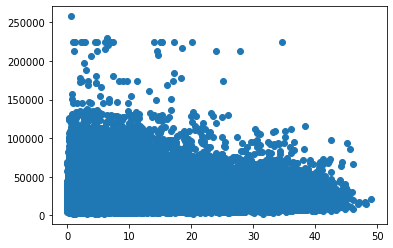

In [144]:
# Removing the outliers and checking
plt.scatter(x="YEARS_EMPLOYED", y="AMT_ANNUITY", data=df_app[df_app["YEARS_EMPLOYED"]<70])
plt.plot()

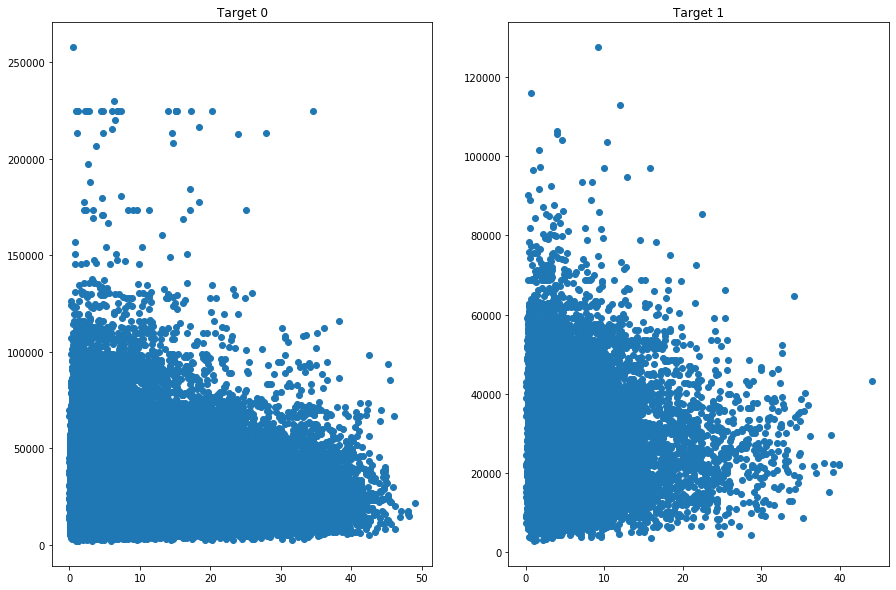

In [145]:
plt.figure(18, figsize=(15,10))

plt.subplot(1,2,1)
plt.scatter(x="YEARS_EMPLOYED", y="AMT_ANNUITY", data=df_app[( df_app["YEARS_EMPLOYED"]<70 ) & ( df_app["TARGET"]==0 ) ])
plt.title("Target 0")

plt.subplot(1,2,2)
plt.scatter(x="YEARS_EMPLOYED", y="AMT_ANNUITY", data=df_app[( df_app["YEARS_EMPLOYED"]<70 ) & ( df_app["TARGET"]==1 ) ])
plt.title("Target 1")

plt.show()

[]

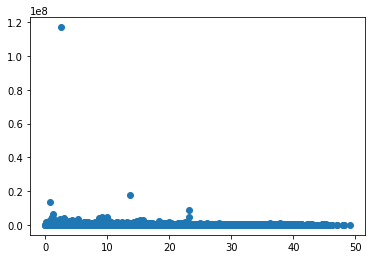

In [146]:
plt.scatter(x="YEARS_EMPLOYED", y="AMT_INCOME_TOTAL", data=df_app[df_app["YEARS_EMPLOYED"]<70])
plt.plot()

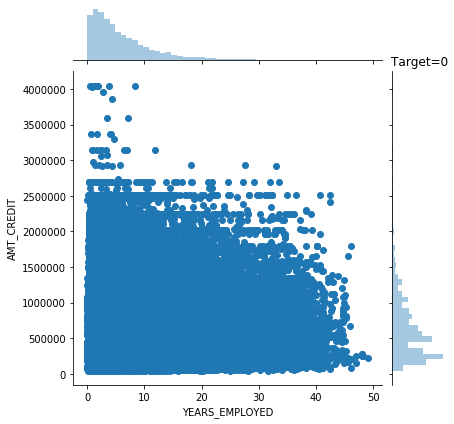

In [147]:
#Months Employed vs Credit Amount, Target = 0
df_temp_t0 = df_app[df_app['TARGET'] == 0][df_app['YEARS_EMPLOYED'] <=60]
sns.jointplot(x = 'YEARS_EMPLOYED',y ='AMT_CREDIT',data = df_temp_t0)
plt.title('Target=0')
plt.show()

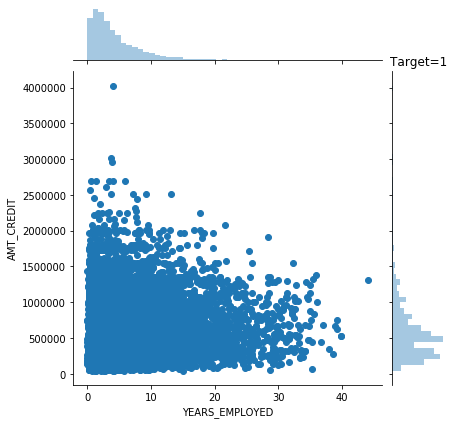

In [148]:
#Months Employed vs Credit Amount, Target = 1
df_temp_t1 = df_app[df_app['TARGET'] == 1][df_app['YEARS_EMPLOYED'] <=60]
sns.jointplot(x = 'YEARS_EMPLOYED',y ='AMT_CREDIT',data = df_temp_t1)
plt.title('Target=1')
plt.show()

[]

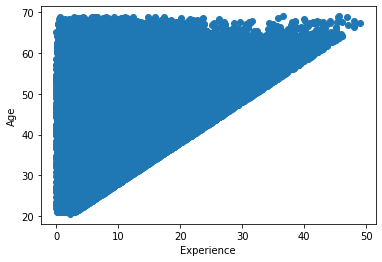

In [149]:
plt.scatter(x="YEARS_EMPLOYED", y="YEARS_BIRTH", data=df_app[df_app["YEARS_EMPLOYED"]<70])
plt.xlabel("Experience")
plt.ylabel("Age")
plt.plot()

So based upon the above we can say that clients who have financial difficulties tend to have shorter tenure with latest companies as compared to clients with no financial difficulties.

#### AMT_ANNUITY

[]

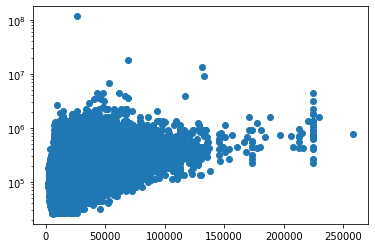

In [150]:
plt.scatter(x="AMT_ANNUITY", y="AMT_INCOME_TOTAL", data=df_app[df_app["YEARS_EMPLOYED"]<70])
plt.yscale("log")
plt.plot()

As per the above plot, initially AMT_INCOME_TOTAL and AMT_ANNUITY are proportionately increasing but post a threshold AMT_INCOME_TOTAL starts plateauing while AMT_ANNUITY increases.

## TASK 7: Current & Previous Application
---------------------------

Here we will merge the dataframes df_app and df_prev       
and perform analysis based upon NAME_CONTRACT_STATUS

In [151]:
df_joined = pd.merge(df_app, df_prev, on='SK_ID_CURR', how="left")

In [152]:
len(df_joined.index)

1430155

In [153]:
df_joined.shape

(1430155, 106)

In [154]:
# df_joined.columns.to_list()

Now lets find the number of Null values in this dataFrame

In [155]:
100* ( df_joined.isnull().sum() / len(df_joined.index) )

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.006503
AMT_GOODS_PRICE_x                0.085236
NAME_TYPE_SUITE                  0.281858
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

Since there are no fields with over 50% null values, there is no need to drop the additional columns.

Also, all the DataTypes have already been validated when working on df_app and df_prev dataframes so this activity is also not required to be perfomed at this stage.

In [156]:
df_joined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25.920548,1.745205,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243,565,125,25,17,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1,0,1,0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243,716,386,536,527,1
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1,0,1,0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243,797,647,647,639,0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1,0,1,0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68

In [157]:
# Check number of unique records
len(df_joined.groupby("SK_ID_CURR"))

307511

Lets evaluate the fields obtained from the df_joined dataframe

In [158]:
df_joined["NAME_CONTRACT_STATUS"].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [159]:
# Data Imbalance
100*df_joined["NAME_CONTRACT_STATUS"].value_counts(normalize=True)

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

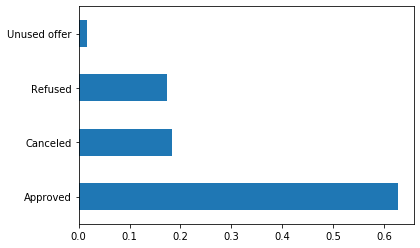

In [160]:
df_joined["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.barh()
plt.show()

As per the above analysis we can observe that almost 63% of the records or applications belong to clients whose previous entries were Approved.

In [161]:
df_joined.groupby("NAME_CONTRACT_STATUS")["TARGET"].value_counts()

NAME_CONTRACT_STATUS  TARGET
Approved              0         818856
                      1          67243
Canceled              0         235641
                      1          23800
Refused               0         215952
                      1          29438
Unused offer          0          20892
                      1           1879
Name: TARGET, dtype: int64

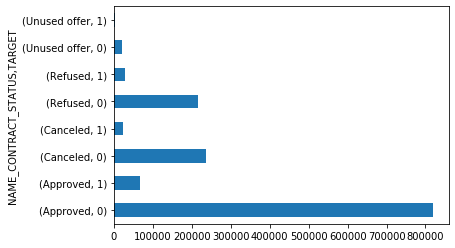

In [162]:
df_joined.groupby("NAME_CONTRACT_STATUS")["TARGET"].value_counts().plot.barh()
plt.show()

Now lets check the purpose of the loan for each category

In [163]:
df_joined.groupby("NAME_CONTRACT_STATUS")['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CONTRACT_STATUS  NAME_CASH_LOAN_PURPOSE          
Approved              XAP                                 619718
                      XNA                                 243306
                      Repairs                               7377
                      Other                                 5744
                      Urgent needs                          3105
                      Everyday expenses                     1056
                      Medicine                               890
                      Buying a used car                      745
                      Education                              647
                      Building a house or an annex           594
                      Purchase of electronic equipment       517
                      Journey                                474
                      Wedding / gift / holiday               337
                      Car repairs                            302
                      Furniture    

In [164]:
df_joined.groupby("NAME_CONTRACT_STATUS")['NAME_PAYMENT_TYPE'].value_counts()

NAME_CONTRACT_STATUS  NAME_PAYMENT_TYPE                        
Approved              Cash through the bank                        699168
                      XNA                                          180177
                      Non-cash from your account                     6003
                      Cashless from the account of the employer       751
Canceled              XNA                                          256753
                      Cash through the bank                          2642
                      Non-cash from your account                       31
                      Cashless from the account of the employer        15
Refused               Cash through the bank                        158594
                      XNA                                           85590
                      Non-cash from your account                     1037
                      Cashless from the account of the employer       169
Unused offer          Cash through the bank     

So from the above, we can say that the company deals with mostly cash transactions

In [165]:
df_joined.groupby("NAME_CONTRACT_STATUS")['CODE_GENDER'].value_counts()

NAME_CONTRACT_STATUS  CODE_GENDER
Approved              F              598626
                      M              287450
                      XNA                23
Canceled              F              179037
                      M               80397
                      XNA                 7
Refused               F              163302
                      M               82063
                      XNA                25
Unused offer          F               14174
                      M                8597
Name: CODE_GENDER, dtype: int64

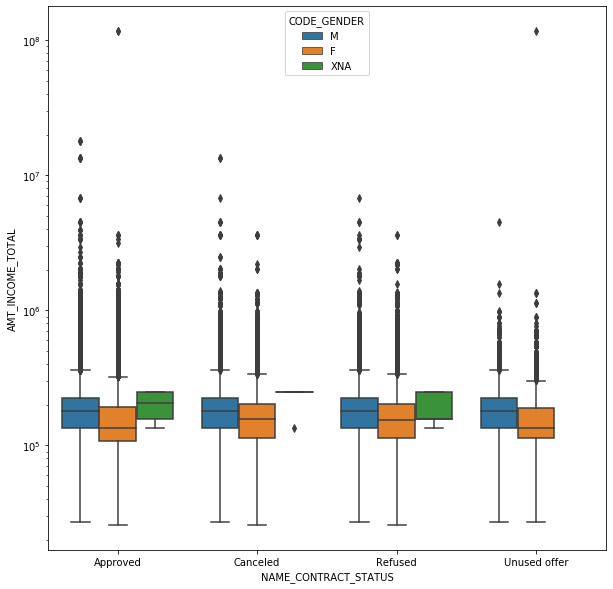

In [166]:
plt.figure(6, figsize=(10,10))
sns.boxplot(y='AMT_INCOME_TOTAL', x='NAME_CONTRACT_STATUS', hue="CODE_GENDER", data=df_joined)
plt.yscale("log")
plt.show()

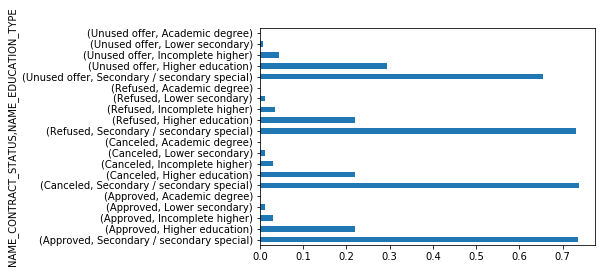

In [167]:
df_joined.groupby("NAME_CONTRACT_STATUS")["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.barh()
plt.show()

In [168]:
df_joined.groupby(["NAME_CONTRACT_STATUS","CODE_GENDER"])["NAME_EDUCATION_TYPE"].value_counts()

NAME_CONTRACT_STATUS  CODE_GENDER  NAME_EDUCATION_TYPE          
Approved              F            Secondary / secondary special    441205
                                   Higher education                 133429
                                   Incomplete higher                 16785
                                   Lower secondary                    6940
                                   Academic degree                     267
                      M            Secondary / secondary special    210861
                                   Higher education                  61568
                                   Incomplete higher                 10881
                                   Lower secondary                    3989
                                   Academic degree                     151
                      XNA          Incomplete higher                    10
                                   Secondary / secondary special         8
                                   

After evaluating the NAME_EDUCATION_TYPE, we can say the Female on average put more load applications than male and the approval count is also larger.

From above you can verify our previous assumption that Female (represented as F) apply for more Loans and have higher approval rate on the said loans compared to Males.

Also a loan raised by Female is less Likely to be cancelled compared to male.

In [169]:
# Lets compare CNT_PAYMENT with few fields
pvt_table = pd.pivot_table(data=df_joined, index="NAME_CONTRACT_STATUS", columns="NAME_CLIENT_TYPE", values="CNT_PAYMENT")
pvt_table

NAME_CLIENT_TYPE,New,Refreshed,Repeater,XNA
NAME_CONTRACT_STATUS,,,,
Approved,11.428689,14.055676,15.340728,16.351724
Canceled,22.872727,37.186567,37.815492,43.578947
Refused,12.656839,20.199339,23.966798,29.520661
Unused offer,10.086957,10.170732,10.091581,12.000000


In [170]:
df_joined.groupby("NAME_CONTRACT_STATUS")["CNT_PAYMENT"].agg(["min", "mean", "max"])

,min,mean,max
NAME_CONTRACT_STATUS,,,
Approved,0.0,14.150861,84.0
Canceled,0.0,37.488813,84.0
Refused,0.0,23.172707,84.0
Unused offer,0.0,10.102171,24.0


Based upon the above analysis of CNT_PAYMENT it can be said that the maximum approved load was for duration of 84 (assumption: months).

In [206]:
df_joined.groupby(["NAME_CONTRACT_STATUS","TARGET"])['NAME_CLIENT_TYPE'].value_counts()

NAME_CONTRACT_STATUS  TARGET  NAME_CLIENT_TYPE
Approved              0       Repeater            519950
                              New                 221012
                              Refreshed            77490
                              XNA                    404
                      1       Repeater             40428
                              New                  21383
                              Refreshed             5401
                              XNA                     31
Canceled              0       Repeater            217629
                              Refreshed            14798
                              New                   2496
                              XNA                    718
                      1       Repeater             21989
                              Refreshed             1306
                              New                    424
                              XNA                     81
Refused               0       Repeater   

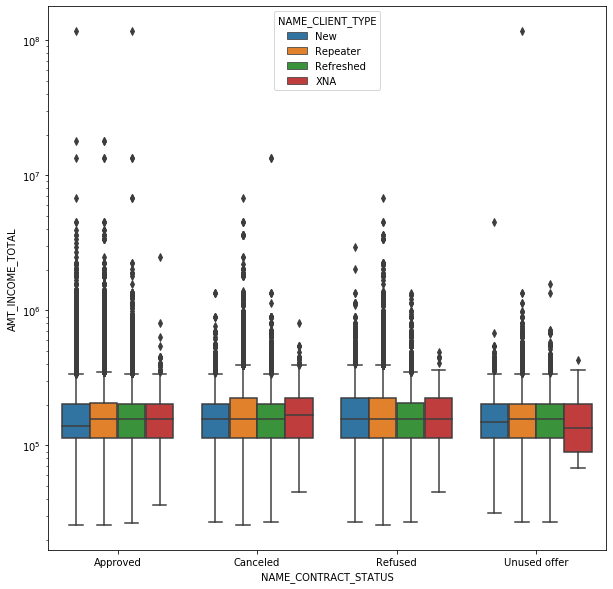

In [172]:
plt.figure(6, figsize=(10,10))
sns.boxplot(y='AMT_INCOME_TOTAL', x='NAME_CONTRACT_STATUS', hue="NAME_CLIENT_TYPE", data=df_joined)
plt.yscale("log")
plt.show()

We can check that the majority of the clients are repeaters, also there is no limit to the loan amount. As can be observed from the outliers.

[]

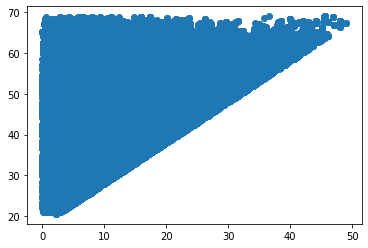

In [173]:
plt.scatter(x="YEARS_EMPLOYED", y="YEARS_BIRTH", data=df_joined[df_joined["YEARS_EMPLOYED"]<70])
plt.plot()

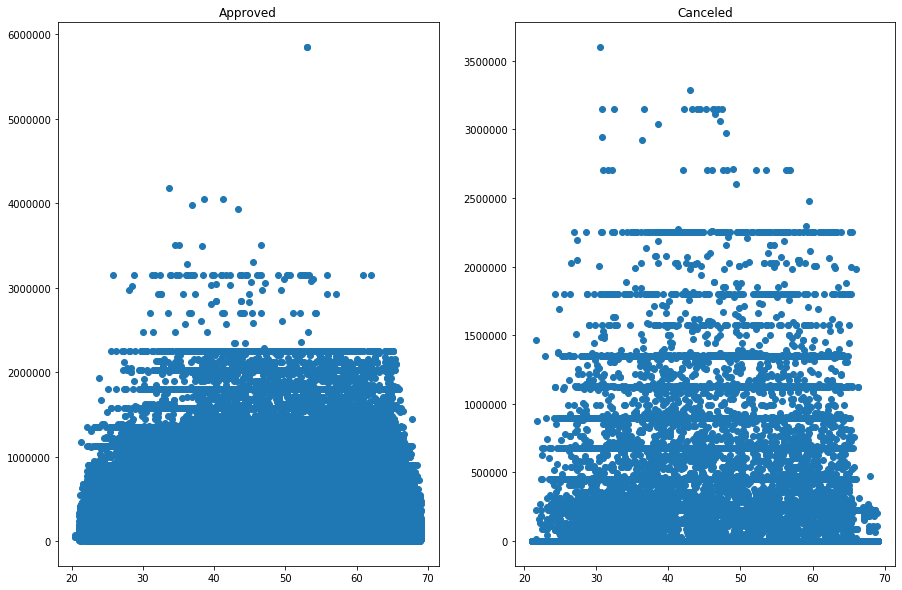

In [174]:
plt.figure(18, figsize=(15,10))

plt.subplot(1,2,1)
plt.scatter(x="YEARS_BIRTH", y="AMT_APPLICATION", data=df_joined[df_joined["NAME_CONTRACT_STATUS"]=="Approved"])
plt.title("Approved")

plt.subplot(1,2,2)
plt.scatter(x="YEARS_BIRTH", y="AMT_APPLICATION", data=df_joined[df_joined["NAME_CONTRACT_STATUS"]=="Canceled"])
plt.title("Canceled")

plt.show()

In [175]:
df_joined[df_joined["YEARS_EMPLOYED"]< 60].groupby("NAME_CONTRACT_STATUS")["YEARS_BIRTH", "YEARS_EMPLOYED"].agg(["min", "mean", "max"])

YEARS_BIRTH                       YEARS_EMPLOYED  \
                             min       mean        max            min   
NAME_CONTRACT_STATUS                                                    
Approved               20.517808  40.987091  69.041096       0.000000   
Canceled               21.093151  41.863541  69.041096       0.002740   
Refused                21.030137  40.750630  68.986301       0.000000   
Unused offer           20.517808  38.122303  68.515068       0.010959   

                                           
                          mean        max  
NAME_CONTRACT_STATUS                       
Approved              6.875107  49.073973  
Canceled              6.604771  48.005479  
Refused               6.381764  47.041096  
Unused offer          6.261290  49.073973

At 1st glace it would feel as if with increase in age the chances of approval of a loan would decrease but that is not the case, as displayed above.

In [176]:
df_joined.groupby("NAME_CONTRACT_STATUS")['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
                                          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
                                          'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
                                          'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                                          'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
                                          'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
                                          'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'].agg(["min", "mean", "max"])

FLAG_DOCUMENT_2               FLAG_DOCUMENT_3            \
                                 min      mean max             min      mean   
NAME_CONTRACT_STATUS                                                           
Approved                           0  0.000065   1               0  0.736676   
Canceled                           0  0.000046   1               0  0.738353   
Refused                            0  0.000114   1               0  0.743975   
Unused offer                       0  0.000088   1               0  0.755874   

                         FLAG_DOCUMENT_4               FLAG_DOCUMENT_5  \
                     max             min      mean max             min   
NAME_CONTRACT_STATUS                                                     
Approved               1               0  0.000089   1               0   
Canceled               1               0  0.000073   1               0   
Refused                1               0  0.000037   1               0   
Unused offer           1               0  0.000044   1               0   

                                   FLAG_DOCUMENT_6                \
                          mean max             min      mean max   
NAME_CONTRACT_STATUS                                               
Approved              0.014091   1               0  0.089031   1   
Canceled              0.011995   1               0  0.101638   1   
Refused               0.013835   1               0  0.082465   1   
Unused offer          0.016205   1               0  0.040490   1   

                     FLAG_DOCUMENT_7               FLAG_DOCUMENT_8            \
                                 min      mean max             min      mean   
NAME_CONTRACT_STATUS                                                           
Approved                           0  0.000173   1               0  0.075406   
Canceled                           0  0.000231   1               0  0.070768   
Refused                            0  0.000342   1               0  0.073438   
Unused offer                       0  0.000176   1               0  0.088578   

                         FLAG_DOCUMENT_9               FLAG_DOCUMENT_10  \
                     max             min      mean max              min   
NAME_CONTRACT_STATUS                                                      
Approved               1               0  0.003285   1                0   
Canceled               1               0  0.002964   1                0   
Refused                1               0  0.003007   1                0   
Unused offer           1               0  0.003557   1                0   

                                   FLAG_DOCUMENT_11                \
                          mean max              min      mean max   
NAME_CONTRACT_STATUS                                                
Approved              0.000035   1                0  0.001382   1   
Canceled              0.000042   1                0  0.000798   1   
Refused               0.000143   1                0  0.003672   1   
Unused offer          0.000088   1                0  0.003250   1   

                     FLAG_DOCUMENT_12               FLAG_DOCUMENT_13  \
                                  min      mean max              min   
NAME_CONTRACT_STATUS                                                   
Approved                            0  0.000002   1                0   
Canceled                            0  0.000000   0                0   
Refused                             0  0.000000   0                0   
Unused offer                        0  0.000000   0                0   

                                   FLAG_DOCUMENT_14                \
                          mean max              min      mean max   
NAME_CONTRACT_STATUS                                                
Approved              0.001741   1                0  0.001311   1   
Canceled              0.001769   1                0  0.001920   1   
Refused               0.001875   1         

based upon above we can say that though documents are necessary for Loan approval but as there is lack of information about which documents are necessary. We can not obtain a correlation between them.

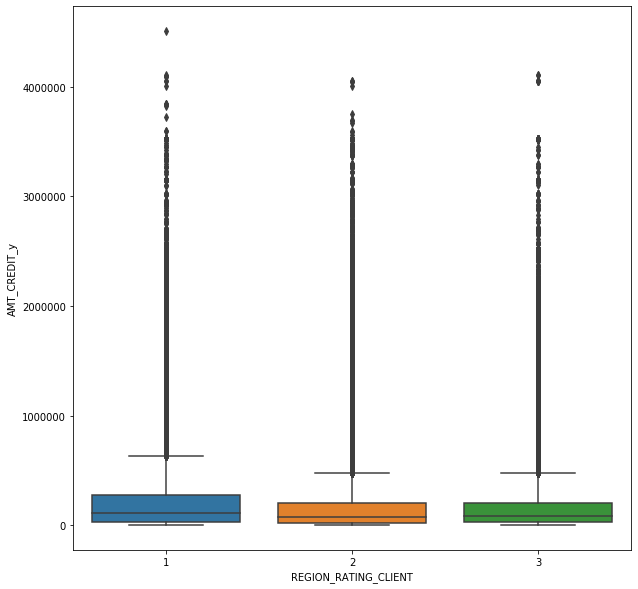

In [177]:
plt.figure(5, figsize=(10,10))
sns.boxplot(y='AMT_CREDIT_y', x='REGION_RATING_CLIENT', data=df_joined)
plt.show()

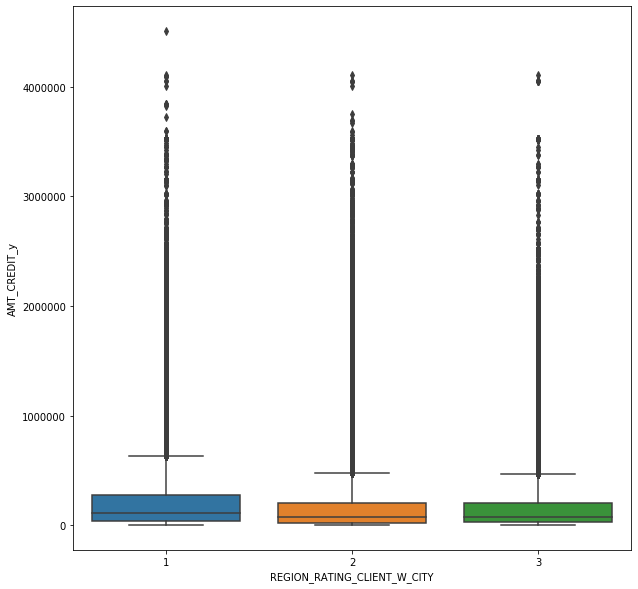

In [178]:
plt.figure(6, figsize=(10,10))
sns.boxplot(y='AMT_CREDIT_y', x='REGION_RATING_CLIENT_W_CITY', data=df_joined)
plt.show()

In [179]:
df_joined.groupby("NAME_CONTRACT_STATUS")["REGION_RATING_CLIENT"].value_counts()

NAME_CONTRACT_STATUS  REGION_RATING_CLIENT
Approved              2                       664775
                      3                       138243
                      1                        83081
Canceled              2                       194390
                      3                        39705
                      1                        25346
Refused               2                       184544
                      3                        37722
                      1                        23124
Unused offer          2                        17480
                      3                         2741
                      1                         2550
Name: REGION_RATING_CLIENT, dtype: int64

In [180]:
# Lets check the interest rate distribution
df_joined.groupby("NAME_CONTRACT_STATUS")["NAME_YIELD_GROUP"].value_counts()

NAME_CONTRACT_STATUS  NAME_YIELD_GROUP
Approved              middle              273331
                      high                258996
                      low_normal          210731
                      XNA                  82411
                      low_action           60630
Canceled              XNA                 251098
                      low_normal            4087
                      middle                2629
                      low_action             821
                      high                   806
Refused               XNA                  73700
                      low_normal           59510
                      middle               48847
                      high                 46197
                      low_action           17136
Unused offer          XNA                  21989
                      low_normal             556
                      middle                 164
                      high                    62
Name: NAME_YIELD_GROUP, dtype:

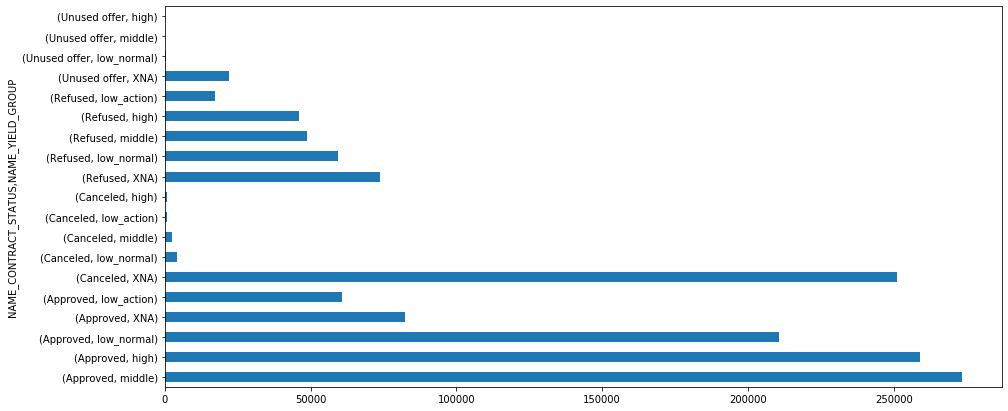

In [181]:
plt.figure(18, figsize=(15,7))
df_joined.groupby("NAME_CONTRACT_STATUS")["NAME_YIELD_GROUP"].value_counts().plot.barh()
plt.show()

In [182]:
df_joined.groupby("NAME_CONTRACT_STATUS")["NAME_PORTFOLIO"].value_counts()

NAME_CONTRACT_STATUS  NAME_PORTFOLIO
Approved              POS               537069
                      Cash              266378
                      Cards              82408
                      Cars                 241
                      XNA                    3
Canceled              XNA               250681
                      Cash                8183
                      Cards                417
                      POS                  127
                      Cars                  33
Refused               Cash              117102
                      POS                54482
                      Cards              39159
                      XNA                34541
                      Cars                 106
Unused offer          XNA                21988
                      POS                  782
                      Cards                  1
Name: NAME_PORTFOLIO, dtype: int64

In [183]:
df_joined.groupby("NAME_CONTRACT_STATUS")["CODE_REJECT_REASON"].value_counts()

NAME_CONTRACT_STATUS  CODE_REJECT_REASON
Approved              XAP                   886091
                      XNA                        8
Canceled              XAP                   259441
Refused               HC                    145984
                      LIMIT                  47773
                      SCO                    32636
                      SCOFR                  10875
                      XNA                     4370
                      VERIF                   3079
                      SYSTEM                   672
                      XAP                        1
Unused offer          CLIENT                 22771
Name: CODE_REJECT_REASON, dtype: int64

## TASK 8: Correlation

We will now calculate correlation after segmenting the application data on the **Target** column. This will allow us to compare correlations between clients that had payment difficulties (Target = 1) vs other cases (Target = 0).

Due to a pandas bug that results in corr() throwing an error when variables with **'Int64'** is passed (not to be confused with 'int64'), we will temporarily convert these variables to **float** to allow them to be passed without removing NaN values. Bug can be referenced here: https://github.com/pandas-dev/pandas/issues/33803


**NOTE:**
There were decrepancies observed in the working of Jupyter Notebook and pandas library, due to version mismatch. As a result we are providing 2 ways to approach the correlation. If the above described datatype issue is observed then you can follow the steps provided in Note 2 below.

In [184]:
#Checking columns with 'Int64' datatype
df_app_t0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int32
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

#### Note 2:
Incase errors are thrown in the following statements due to the error explained above
* df_app_t0.corr()
* df_app_t1.corr()

uncomment the below 2 cells and run to do data conversion on both the fields as explained previously

In [185]:
# Converting 'Int64' columns to float in Target = 0 and Target = 1 segmentations in order to use them in corr()

# df_app_t0['AMT_REQ_CREDIT_BUREAU_YEAR'] = pd.to_numeric(df_app_t0['AMT_REQ_CREDIT_BUREAU_YEAR'],errors = 'raise',downcast = 'float')
# df_app_t0['AMT_REQ_CREDIT_BUREAU_QRT'] = pd.to_numeric(df_app_t0['AMT_REQ_CREDIT_BUREAU_QRT'],errors = 'raise',downcast = 'float')
# df_app_t0['AMT_REQ_CREDIT_BUREAU_MON'] = pd.to_numeric(df_app_t0['AMT_REQ_CREDIT_BUREAU_MON'],errors = 'raise',downcast = 'float')
# df_app_t0['AMT_REQ_CREDIT_BUREAU_WEEK'] = pd.to_numeric(df_app_t0['AMT_REQ_CREDIT_BUREAU_WEEK'],errors = 'raise',downcast = 'float')
# df_app_t0['AMT_REQ_CREDIT_BUREAU_DAY'] = pd.to_numeric(df_app_t0['AMT_REQ_CREDIT_BUREAU_DAY'],errors = 'raise',downcast = 'float')
# df_app_t0['AMT_REQ_CREDIT_BUREAU_HOUR'] = pd.to_numeric(df_app_t0['AMT_REQ_CREDIT_BUREAU_HOUR'],errors = 'raise',downcast = 'float')
# df_app_t0['DAYS_LAST_PHONE_CHANGE'] = pd.to_numeric(df_app_t0['DAYS_LAST_PHONE_CHANGE'],errors = 'raise',downcast = 'float')
# df_app_t0['DEF_60_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t0['DEF_60_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t0['OBS_60_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t0['OBS_60_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t0['DEF_30_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t0['DEF_30_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t0['OBS_30_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t0['OBS_30_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t0['CNT_FAM_MEMBERS'] = pd.to_numeric(df_app_t0['CNT_FAM_MEMBERS'],errors = 'raise',downcast = 'float')

In [186]:
# df_app_t1['AMT_REQ_CREDIT_BUREAU_YEAR'] = pd.to_numeric(df_app_t1['AMT_REQ_CREDIT_BUREAU_YEAR'],errors = 'raise',downcast = 'float')
# df_app_t1['AMT_REQ_CREDIT_BUREAU_QRT'] = pd.to_numeric(df_app_t1['AMT_REQ_CREDIT_BUREAU_QRT'],errors = 'raise',downcast = 'float')
# df_app_t1['AMT_REQ_CREDIT_BUREAU_MON'] = pd.to_numeric(df_app_t1['AMT_REQ_CREDIT_BUREAU_MON'],errors = 'raise',downcast = 'float')
# df_app_t1['AMT_REQ_CREDIT_BUREAU_WEEK'] = pd.to_numeric(df_app_t1['AMT_REQ_CREDIT_BUREAU_WEEK'],errors = 'raise',downcast = 'float')
# df_app_t1['AMT_REQ_CREDIT_BUREAU_DAY'] = pd.to_numeric(df_app_t1['AMT_REQ_CREDIT_BUREAU_DAY'],errors = 'raise',downcast = 'float')
# df_app_t1['AMT_REQ_CREDIT_BUREAU_HOUR'] = pd.to_numeric(df_app_t1['AMT_REQ_CREDIT_BUREAU_HOUR'],errors = 'raise',downcast = 'float')
# df_app_t1['DAYS_LAST_PHONE_CHANGE'] = pd.to_numeric(df_app_t1['DAYS_LAST_PHONE_CHANGE'],errors = 'raise',downcast = 'float')
# df_app_t1['DEF_60_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t1['DEF_60_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t1['OBS_60_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t1['OBS_60_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t1['DEF_30_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t1['DEF_30_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t1['OBS_30_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(df_app_t1['OBS_30_CNT_SOCIAL_CIRCLE'],errors = 'raise',downcast = 'float')
# df_app_t1['CNT_FAM_MEMBERS'] = pd.to_numeric(df_app_t1['CNT_FAM_MEMBERS'],errors = 'raise',downcast = 'float')

In [187]:
#Checking correlation for Target = 0 segmentation
df_app_t0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001589,0.000309,-0.000695,0.000556,-0.000741,0.002382,0.000998,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-0.000852,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349,0.001346
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172,0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-0.002859,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547,-0.336966
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,0.000637,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536,-0.062609
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-0.003243,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866,0.047378
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.000161,0.105645,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0

In [188]:
#Checking correlation for Target = 1 segmentation
df_app_t1.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,0.001254,-0.005161,-0.006342,0.002539,NaN,0.005248,0.004970,-0.003039,0.018246,0.000831,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.006452,-0.008178,-0.009395,-0.005549,-0.009058,-0.009428,-0.002455,-0.002291,-0.004640,NaN,0.002669,0.003320,0.002342,0.003887,-0.005247,NaN,-0.003634,NaN,-0.001685,0.001327,0.007977,-0.000704,-0.005428,-0.009181,-0.006382,0.003781,0.006932,-0.012036,-0.007954,-0.002999,0.006436,-0.000880,0.008916,0.001254
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,NaN,0.192469,0.051712,0.003592,-0.024306,0.013902,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,-0.020268,0.025804,0.001448,0.025180,-0.005106,-0.011547,-0.007779,0.060561,NaN,-0.022138,-0.129482,-0.001895,0.028766,0.003591,NaN,-0.007550,NaN,0.001663,-0.002932,0.004800,-0.001079,-0.005500,0.004333,-0.001370,-0.002395,0.001136,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427,-0.259109
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014977,-0.000158,0.004215,NaN,0.014971,-0.012146,-0.000878,-0.004478,0.009889,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.015110,-0.004709,-0.005186,-0.004616,-0.004866,0.002429,0.000168,0.001446,NaN,-0.001094,-0.011774,-0.000561,0.016119,0.004616,NaN,-0.000172,NaN,0.006271,0.003969,0.001871,0.001717,-0.000368,-0.002177,-0.000371,-0.000450,-0.000647,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752,-0.003096
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,0.135316,0.001930,0.025854,0.052329,NaN,-0.000660,-0.059601,0.031771,0.008608,0.010157,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.077698,0.019098,-0.025979,0.019487,-0.030880,0.110851,0.034225,0.061629,NaN,-0.012192,-0.005333,-0.012227,0.056351,0.025318,NaN,0.037012,NaN,0.018148,0.063136,0.026399,0.046752,-0.000694,0.011174,0.013442,0.016949,-0.021964,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719,0.135316
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,0.014303,-0.081207,-0.034279,0.016767,NaN,0.081797,-0.049845,0.035656,-0.013768,0.078188,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.041415,0.004463,-0.022394,

As this is not easily readable and top 10 correlations cannot be easily picked, we will convert the format by starting with unstacking.

In [189]:
#Assigning the correlation results to new variables
corr_t0 = df_app_t0.corr()
corr_t1 = df_app_t1.corr()

In [190]:
#Assigning NaNs to values that are repeat comparisons. This will allow us to elimiate repeat comparisons post unstacking
corr_t0 = corr_t0.where(np.triu(np.ones(corr_t0.shape),k = 1).astype(np.bool))
corr_t1 = corr_t1.where(np.triu(np.ones(corr_t1.shape),k = 1).astype(np.bool))
corr_t0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001589,0.000309,-0.000695,0.000556,-0.000741,0.002382,0.000998,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-0.000852,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349,0.001346
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172,0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-0.002859,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547,-0.336966
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,0.000637,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536,-0.062609
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-0.003243,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866,0.047378
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.000161,0.105645,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.126615,0.028051,-0.013091,-0.022535,-0.012893,-0.

In [191]:
#Unstack the correlation data and resetting index to improve readability
corr_t0_df = corr_t0.unstack().reset_index()
corr_t1_df = corr_t1.unstack().reset_index()
corr_t0_df

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN
5,SK_ID_CURR,AMT_ANNUITY,NaN
6,SK_ID_CURR,AMT_GOODS_PRICE,NaN
7,SK_ID_CURR,REGION_POPULATION_RELATIVE,NaN
8,SK_ID_CURR,DAYS_BIRTH,NaN
9,SK_ID_CURR,DAYS_EMPLOYED,NaN


In [192]:
#Rename columns
corr_t0_df.columns = ['Variable_1','Variable_2','Correlation']
corr_t1_df.columns = ['Variable_1','Variable_2','Correlation']

In [193]:
#Drop all rows where Correlation = NaN. As mentioned earlier, these were repeat comparisons.
corr_t0_df.dropna(subset = ['Correlation'],inplace = True)
corr_t1_df.dropna(subset = ['Correlation'],inplace = True)

In [194]:
#Quick check on the dataframe format
corr_t0_df.head(10)

,Variable_1,Variable_2,Correlation
124,CNT_CHILDREN,SK_ID_CURR,-0.000716
186,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
188,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
248,AMT_CREDIT,SK_ID_CURR,-0.000342
250,AMT_CREDIT,CNT_CHILDREN,0.003081
251,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
310,AMT_ANNUITY,SK_ID_CURR,0.000068
312,AMT_ANNUITY,CNT_CHILDREN,0.020905
313,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
314,AMT_ANNUITY,AMT_CREDIT,0.771309


In [195]:
#Repeating check for Target = 1 dataframe
corr_t1_df.head(10)

,Variable_1,Variable_2,Correlation
124,CNT_CHILDREN,SK_ID_CURR,-0.005144
186,AMT_INCOME_TOTAL,SK_ID_CURR,-0.010165
188,AMT_INCOME_TOTAL,CNT_CHILDREN,0.004796
248,AMT_CREDIT,SK_ID_CURR,-0.001290
250,AMT_CREDIT,CNT_CHILDREN,-0.001675
251,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
310,AMT_ANNUITY,SK_ID_CURR,-0.007578
312,AMT_ANNUITY,CNT_CHILDREN,0.031257
313,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
314,AMT_ANNUITY,AMT_CREDIT,0.752195


In [196]:
#Round off correlation to 2 decimal places
corr_t0_df['Correlation'] = round(corr_t0_df['Correlation'],2)
corr_t1_df['Correlation'] = round(corr_t1_df['Correlation'],2)

In [197]:
#Convert to absolute values as we are interested in strength of the correlation and not if the variables are impacted positively or negatively
corr_t0_df['Correlation'] = corr_t0_df['Correlation'].abs()
corr_t1_df['Correlation'] = corr_t1_df['Correlation'].abs()

In [198]:
#Sort correlation by descending to pick the top correlations
corr_t0_df.sort_values(by = 'Correlation', ascending =  False,inplace = True)
corr_t1_df.sort_values(by = 'Correlation', ascending =  False,inplace = True)

In [204]:
#Checking the top 10 correlations for Target = 0
corr_t0_df.head(10)

,Variable_1,Variable_2,Correlation
2014,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
3790,YEARS_BIRTH,DAYS_BIRTH,1.00
815,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
376,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1259,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1118,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1511,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
2077,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1700,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
377,AMT_GOODS_PRICE,AMT_ANNUITY,0.78


In [205]:
#Checking the top 10 correlations for Target = 1
corr_t1_df.head(10)

,Variable_1,Variable_2,Correlation
2014,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
3790,YEARS_BIRTH,DAYS_BIRTH,1.00
815,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
376,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1259,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
1118,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
2077,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
1511,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
1700,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
377,AMT_GOODS_PRICE,AMT_ANNUITY,0.75


#### Observation:

While the above displays the top 10 correlations, some of them do not demonstrate or count as useful correlations.       
eg.
* OBS_60_CNT_SOCIAL_CIRCLE vs OBS_30_CNT_SOCIAL_CIRCLE -> OBS_30 is a subset of OBS_60
* YEARS_BIRTH vs DAYS_BIRTH -> YEARS_BIRTH is derived from DAYS_BIRTH hence it is directly correlated
* YEARS_EMPLOYED vs DAYS_EMPLOYED -> YEARS_EMPLOYED is derived from DAYS_EMPLOYED hence it is directly correlated